In [1]:
from models import Dim
from datasets import coil2000, orl, fifa
from datetime import datetime
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import seaborn as sns
import yaml
config = yaml.safe_load(open("config.yml"))

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Artificial Dataset - Single Label

In [3]:
%matplotlib inline

X, y = make_blobs(1000, n_features=300, centers=20,
                  cluster_std=2, random_state=34)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

dim = Dim()
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.apply_dim(num_dim=[20], tflag=[3, 6, 7, 8])

('20Dim', 'LLE', 'k=30-reg=0.001'): 100%|██████████| 1/1 [00:03<00:00,  3.10s/it]


In [4]:
weights = dim.get_weights().droplevel(3, axis=1)
weights

5Dim                                                         \
               SLMVP                                PCA      KPCA       LOL   
  Polynomial-Order=5 Linear Radial-Gammas=0.1              Radial             
0                0.2    0.2               0.2  0.221674  0.200137  0.210194   
1                0.2    0.2               0.2  0.208782  0.200064  0.239020   
2                0.2    0.2               0.2  0.202477  0.200025  0.189060   
3                0.2    0.2               0.2  0.189710  0.199949  0.181523   
4                0.2    0.2               0.2  0.177358  0.199826  0.180202   

                            
        LPP            LLE  
       k=17 k=30-reg=0.001  
0  0.206704       0.199626  
1  0.185770       0.200327  
2  0.207666       0.199860  
3  0.208760       0.199626  
4  0.191098       0.200561

In [12]:
weights[('5Dim', 'LPP', 'k=17')][2]

0.20766632565803353

In [29]:

df

100%|██████████| 8/8 [00:00<00:00, 27.50it/s]


5Dim                                                  \
                 SLMVP                                   PCA      KPCA   
    Polynomial-Order=5    Linear Radial-Gammas=0.1              Radial   
0             0.000317  0.000424          0.000303  0.000288  0.000356   
1             0.000371  0.000368          0.000489  0.000338  0.000390   
2             0.000243  0.000242          0.000362  0.000356  0.000417   
3             0.000219  0.000245          0.000269  0.000221  0.000192   
4             0.000298  0.000325          0.000330  0.000369  0.000386   
..                 ...       ...               ...       ...       ...   
295           0.000348  0.000294          0.000311  0.000374  0.000318   
296           0.000422  0.000352          0.000415  0.000385  0.000211   
297           0.000221  0.000226          0.000233  0.000296  0.000216   
298           0.000316  0.000309          0.000171  0.000277  0.000326   
299           0.000287  0.000353          0.000424  0.000336  0.000304   

                                        
          LOL       LPP            LLE  
                   k=17 k=30-reg=0.001  
0    0.000225  0.000272       0.000292  
1    0.000358  0.000462       0.000252  
2    0.000412  0.000441       0.000141  
3    0.000302  0.000213       0.000307  
4    0.000311  0.000258       0.000203  
..        ...       ...            ...  
295  0.000507  0.000432       0.000415  
296  0.000398  0.000284       0.000147  
297  0.000210  0.000202       0.000343  
298  0.000405  0.000345       0.000169  
299  0.000230  0.000443       0.000302  

[300 rows x 8 columns]

In [ ]:
dim.apply_clf().head(5)

### Classification Results

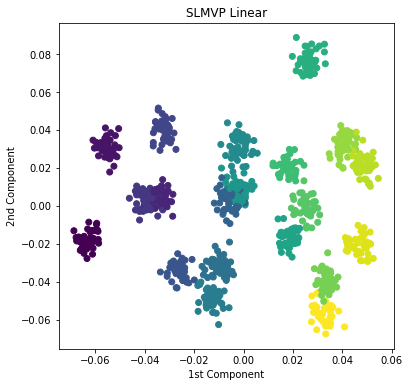

In [57]:
y = dim.y_train
# Creating the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(dim.new_dim[('2Dim', 'SLMVP', 'Linear')][0][0],
             dim.new_dim[('2Dim', 'SLMVP', 'Linear')][0][1], c=y)

# Adding labels and title
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.title('SLMVP Linear')
#plt.savefig('/Users/espina/Documents/TFM/tfm_code/plots/artificial_slmvp_linear.png')
plt.show()

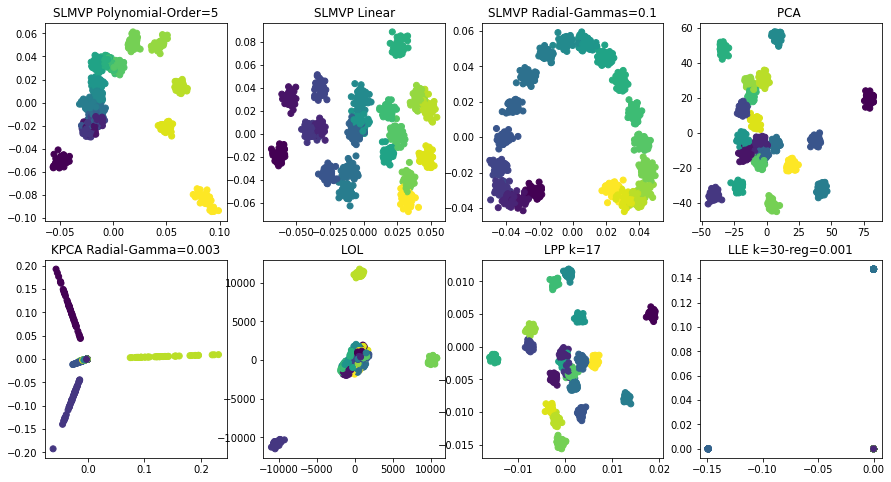

In [46]:
dim.plot_artificial(n_rows=2, n_cols=4, figsize=(15, 8)) 

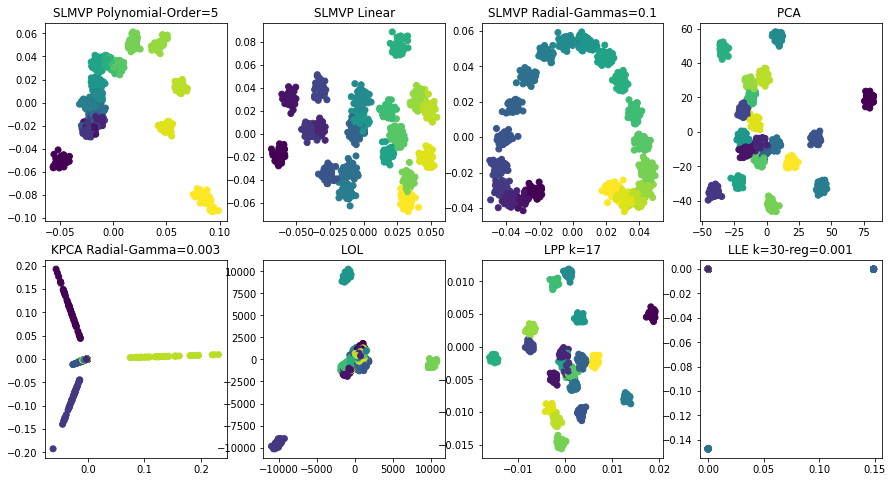

In [4]:
#dim.plot_artificial(n_rows=2, n_cols=4, figsize=(15, 8), save_name='artificial_2d.png')    
   

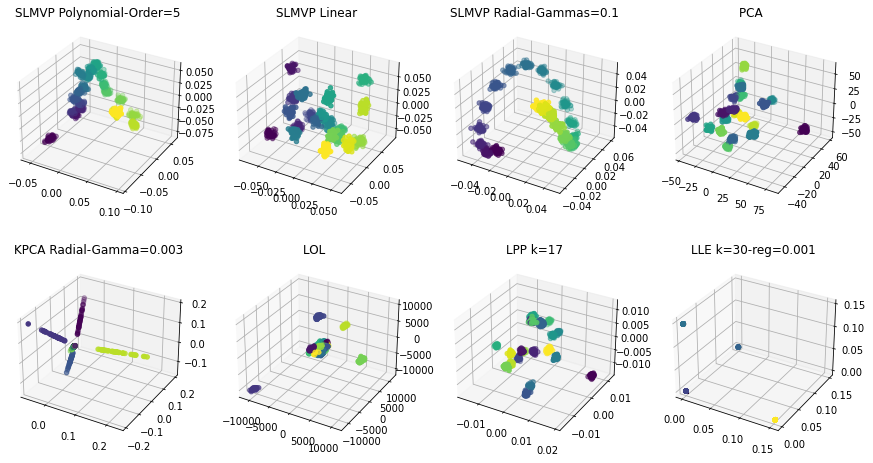

In [7]:
dim.plot_artificial_3D(n_rows=2, n_cols=4, figsize=(15, 8), save_name='artificial_3d.png')    
#dim.plot_artificial_3D(n_rows=3, n_cols=3, figsize=(12, 12), save_name=None)

### Tables

In [ ]:
df = pd.DataFrame.from_dict(dim.scores, orient='index', columns=[
                            'Model', 'Best Score', 'Params', 'MAE']).reset_index()
df[['Model', 'Dimensions', 'Dim. Technique', 'Dim. Params']] = pd.DataFrame(
    df['index'].tolist(), index=df.index)

df = df.drop('index', axis=1)

df = df.sort_values('MAE', ascending=True)

In [9]:
df = pd.read_csv('scores/artificial.csv', index_col=0)
if 'Best Score' in df.columns:
    df = df.rename(columns = {'Best Score':'Accuracy'})
df['Dimensions'] = df['Dimensions'].str[:-3].astype(int)


max_value_mask = df.groupby(['Dim. Technique', 'Dimensions'])['Accuracy'].idxmax()
df = df.loc[max_value_mask]
df = df.set_index('Dimensions').sort_values(['Dimensions','Accuracy'], ascending=[1,0])
df = df[['Dim. Technique', 'Dim. Params', 'Model', 'Accuracy']]

df

Dim. Technique         Dim. Params          Model  Accuracy
Dimensions                                                            
1                     LLE      k=30-reg=0.001        XGBoost      0.90
1                    KPCA              Linear        XGBoost      0.63
1                     PCA                 NaN            KNN      0.57
1                   SLMVP              Linear        XGBoost      0.56
1                     LPP                k=17  Decision Tree      0.47
1                     LOL                 NaN            LDA      0.34
2                    KPCA              Linear            KNN      0.96
2                     PCA                 NaN  Random Forest      0.96
2                   SLMVP              Linear            LDA      0.96
2                     LLE      k=30-reg=0.001            KNN      0.91
2                     LPP                k=17  Random Forest      0.89
2                     LOL                 NaN            LDA      0.64
3                    KPCA              Linear            LDA      1.00
3                     LLE      k=30-reg=0.001            LDA      1.00
3                     PCA                 NaN            LDA      1.00
3                   SLMVP              Linear            LDA      1.00
3                     LPP                k=17            LDA      0.96
3                     LOL                 NaN            LDA      0.85
4                    KPCA              Linear            LDA      1.00
4                     LLE      k=30-reg=0.001            KNN      1.00
4                     LPP                k=17            LDA      1.00
4                     PCA                 NaN            LDA      1.00
4                   SLMVP  Polynomial-Order=5            LDA      1.00
4                     LOL                 NaN    Naive Bayes      0.95
5                    KPCA              Linear            LDA      1.00
5                     LLE      k=30-reg=0.001            KNN      1.00
5                     LPP                k=17  Random Forest      1.00
5                     PCA                 NaN            LDA      1.00
5                   SLMVP              Linear            LDA      1.00
5                     LOL                 NaN            KNN      0.99

In [6]:
df = pd.read_csv('scores/artificial.csv', index_col=0)
if 'Best Score' in df.columns:
    df = df.rename(columns = {'Best Score':'Accuracy'})
df['Dimensions'] = df['Dimensions'].str[:-3].astype(int)


max_value_mask = df.groupby(['Dim. Technique', 'Dimensions'])['Accuracy'].idxmax()
df = df.loc[max_value_mask]
df = df.set_index('Dimensions').sort_values(['Dimensions','Accuracy'], ascending=[1,0])
df = df[['Dim. Technique', 'Dim. Params', 'Model', 'Accuracy', 'MAE']]

if 'MAE' in df.columns:
    max_value_mask = df.groupby(['Dim. Technique', 'Dimensions'])['MAE'].idxmax()
    df_mae = df.loc[max_value_mask]
    df_mae = df_mae.set_index('Dimensions').sort_values(['Dimensions','MAE'], ascending=[1,1])
    df_mae = df_mae[['Dim. Technique', 'Dim. Params', 'Model', 'MAE']]

KeyError: "['MAE'] not in index"

In [5]:

df = pd.DataFrame.from_dict(dim.scores, orient='index', columns=[
                            'Model', 'Accuracy', 'Params', 'MAE']).reset_index()
df[['Model', 'Dimensions', 'Dim. Technique', 'Dim. Params']] = pd.DataFrame(
    df['index'].tolist(), index=df.index)

df = df.drop('index', axis=1)

df = df.sort_values('Accuracy', ascending=False)

file_name = datetime.now().strftime('%m-%d-%H:%M')

df.to_csv('/Users/espina/Documents/TFM/tfm_code/scores/' +
            file_name + '.csv')
df.to_excel(
    '/Users/espina/Documents/TFM/tfm_code/scores/' + file_name + '.xlsx')

# df = df.groupby('Dim. Technique', as_index=False).first()

print('saved as ' + file_name + '(.csv)(.xlsx)')

saved as 07-04-15:04(.csv)(.xlsx)


In [ ]:
print(df.to_latex(na_rep=''))

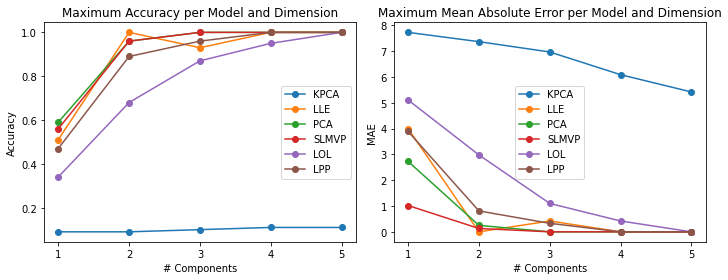

In [43]:
import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4, 5]
techniques = ['KPCA', 'LLE', 'PCA', 'SLMVP', 'LOL', 'LPP']

# Creating the first subplot for Accuracy
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ax1 = axes[0]
for tech in techniques:
    ax1.plot(x_values, df_acc[df_acc['Dim. Technique'] == tech]['Accuracy'], marker='o', label=tech)

# Adding labels and title to the first subplot
ax1.set_xticks(x_values)
ax1.set_xlabel('# Components')
ax1.set_ylabel('Accuracy')
ax1.set_title('Maximum Accuracy per Model and Dimension')
ax1.legend()

# Creating the second subplot for MAE
ax2 = axes[1]
for tech in techniques:
    ax2.plot(x_values, df_acc[df_acc['Dim. Technique'] == tech]['MAE'], marker='o', label=tech)

# Adding labels and title to the second subplot
ax2.set_xticks(x_values)
ax2.set_xlabel('# Components')
ax2.set_ylabel('MAE')
ax2.set_title('Maximum Mean Absolute Error per Model and Dimension')
ax2.legend()

plt.tight_layout()  # To prevent overlapping of subplots
#plt.savefig('plots/artificial_line_chart.png')
plt.show()


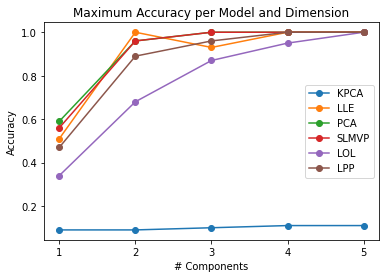

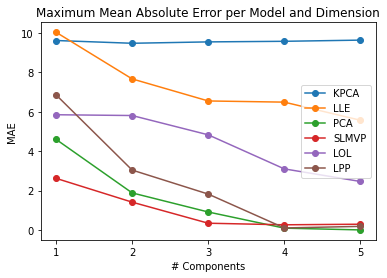

In [26]:
import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4, 5]
techniques = ['KPCA', 'LLE', 'PCA', 'SLMVP', 'LOL', 'LPP']

for tech in techniques:
    plt.plot(x_values, df_acc[df_acc['Dim. Technique'] == tech]['Accuracy'], marker='o', label=tech)

# Adding labels and title
plt.xticks(x_values)
plt.xlabel('# Components')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy per Model and Dimension')
plt.legend()
#plt.savefig('plots/artificial_line_chart.png')
plt.show()

import matplotlib.pyplot as plt

x_values = [1, 2, 3, 4, 5]
techniques = ['KPCA', 'LLE', 'PCA', 'SLMVP', 'LOL', 'LPP']

for tech in techniques:
    plt.plot(x_values, df_mae[df_mae['Dim. Technique'] == tech]['MAE'], marker='o', label=tech)

# Adding labels and title
plt.xticks(x_values)
plt.xlabel('# Components')
plt.ylabel('MAE')
plt.title('Maximum Mean Absolute Error per Model and Dimension')
plt.legend()
#plt.savefig('plots/artificial_line_chart.png')
plt.show()



### Heat Map - Big

100%|██████████| 8/8 [00:00<00:00, 22.18it/s]


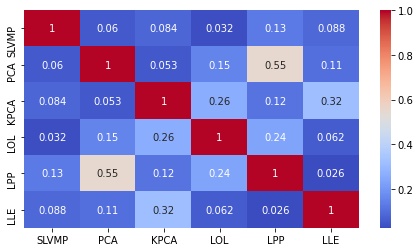

In [ ]:
# Heatmap with multiple dimensions

df = dim.get_corr_table(5)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key] = df[key].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

df = df.droplevel(0, axis=1)
df= df.drop(
    [('SLMVP',             'Linear'),
     ('SLMVP', 'Polynomial-Order=5')],
      axis=1)
df = df.droplevel(1, axis=1)

#df.corr(method='spearman').style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(7.5,4))
col_labels = ['SLVMP','PCA','KPCA','LOL','LPP', 'LLE']
sns.heatmap(df.corr(method='spearman').abs(), annot=True, cmap='coolwarm',
             xticklabels=col_labels, yticklabels=col_labels)
#             vmin=0, vmax=0.55)

plt.savefig('plots/heatmap_artificial_5dim.png', dpi=300, bbox_inches='tight')

### Hbar Plot

#### 1 dim

100%|██████████| 1/1 [00:00<00:00, 52.01it/s]


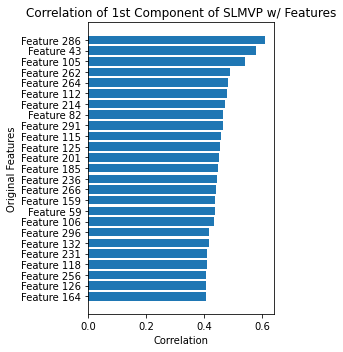

In [22]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[1], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(1)

# Sample data

values = df[('1Dim', 'SLMVP',  'Radial-Gammas=0.1', 0)].sort_values(ascending=True)[-25:]
categories = ['Feature ' + str(i) for i in values.index]
plt.figure(figsize=(4, 5))
# Create horizontal bar plot
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 1st Component of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_artificial.png')

#### 5 dim

100%|██████████| 1/1 [00:00<00:00, 55.01it/s]


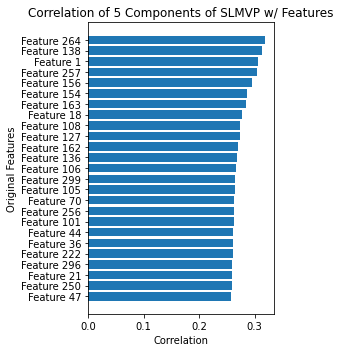

In [23]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[5], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(5)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

# Sample data

values = df[('5Dim', 'SLMVP',  'Radial-Gammas=0.1')].sort_values(ascending=True)[-25:]
categories = ['Feature ' + str(i) for i in values.index]
plt.figure(figsize=(4, 5))
# Create horizontal bar plot
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 5 Components of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_artificial_5dim.png')

#### 20 dim

100%|██████████| 1/1 [00:00<00:00, 12.25it/s]


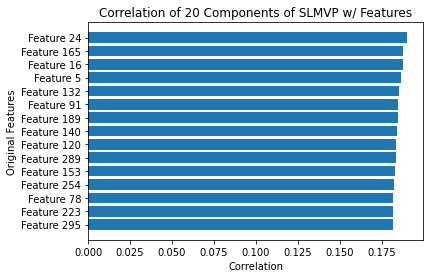

In [4]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[20], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(20)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

# Sample data

values = df[('20Dim', 'SLMVP',  'Radial-Gammas=0.1')].sort_values(ascending=True)[-15:]
categories = ['Feature ' + str(i) for i in values.index]
# Create horizontal bar plot
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 20 Components of SLMVP w/ Features')
plt.savefig('plots/hbar_artificial_20dim.png')

## Eigenvectors

In [2]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, n_features=300, centers=20,
                  cluster_std=2, random_state=34)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

dim = Dim()
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.apply_dim(num_dim=2)

('2Dim', 'LLE', 'k=30-reg=0.001'): 100%|██████████| 1/1 [00:13<00:00, 13.51s/it]


In [57]:
import numpy as np

autovalores = list()
for i in range(2):
    #A = np.array([[250,588],[-105,-247]])
    #e = np.array([7,-3])
    e = evectors[:,0]
    B = np.dot(A,e)
    B
    v = B[i]/e[i]
    autovalores.append(v)
    print("Autovalor 1: " + str(v))

for i in range(2):
    # A = np.array([[250,588],[-105,-247]])
    # e = np.array([12,-5])
    e = evectors[:,1]
    B = np.dot(A,e)
    B
    v = B[i]/e[i]
    print("Autovalor 2: " + str(v))

Autovalor 1: 3.746441504497587e+19
Autovalor 1: 1.0751205853305358e+20
Autovalor 2: -1.3940422215755612e+19
Autovalor 2: 4.875694126649993e+19


## Artificial Dataset - Multilabel

In [2]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split

X, y = make_multilabel_classification(150, n_features=300, n_classes=2, random_state=34)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

dim = Dim()
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.apply_dim(num_dim=2, multilabel=True)

('2Dim', 'LLE', 'k=11-reg=0.001'): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


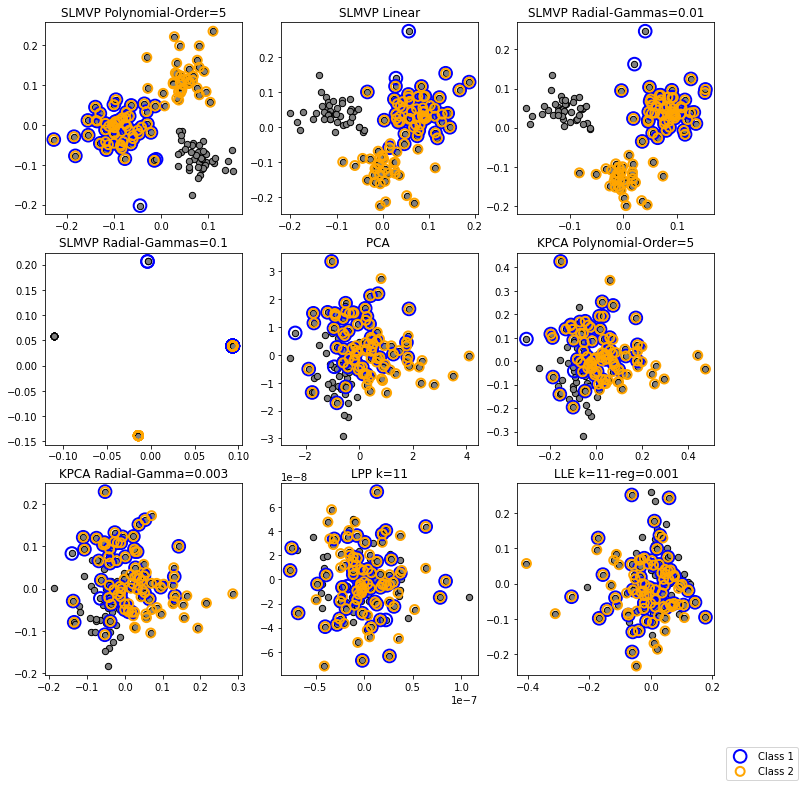

In [3]:
dim.plot_artificial_multilabel(n_rows=3, n_cols=3, figsize=(12, 12), save_name='2D-multilabel')

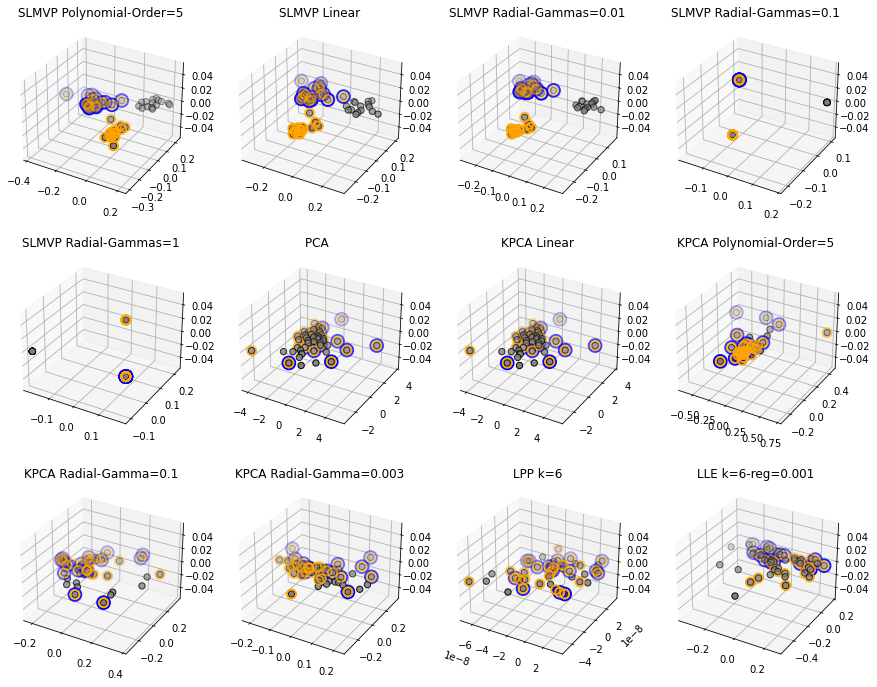

In [6]:
dim.plot_artificial_multilabel_3D(n_rows=3, n_cols=4, save_name=None)

## Comparing Techniques

In [4]:
dim.get_corr_table()

100%|██████████| 10/10 [00:00<00:00, 29.50it/s]


2Dim                                                   \
                 SLMVP                                                    
    Polynomial-Order=5              Linear           Radial-Gammas=0.01   
                     0         1         0         1                  0   
0             0.223294  0.276730  0.261166  0.408148           0.223469   
1             0.098383  0.236989  0.138051  0.178926           0.228362   
2             0.111347  0.136360  0.216797  0.214876           0.222584   
3             0.182475  0.016917  0.069878  0.175236           0.156239   
4             0.243517  0.347825  0.302292  0.295636           0.214810   
..                 ...       ...       ...       ...                ...   
295           0.045447  0.042773  0.086454  0.235281           0.016308   
296           0.129512  0.448272  0.482807  0.181751           0.433419   
297           0.142368  0.183190  0.072653  0.301154           0.063116   
298           0.044204  0.282443  0.079118  0.170442           0.033737   
299           0.441740  0.170682  0.465957  0.222941           0.384363   

                                                               \
                                                PCA             
              Radial-Gammas=0.1                                 
            1                 0         1         0         1   
0    0.091483          0.213077  0.003170  0.430470  0.274954   
1    0.362014          0.306584  0.513366  0.301229  0.084892   
2    0.177720          0.185639  0.127963  0.542807  0.021667   
3    0.177655          0.180176  0.067205  0.000444  0.312411   
4    0.110666          0.166372  0.065387  0.191833  0.351191   
..        ...               ...       ...       ...       ...   
295  0.324238          0.058874  0.310166  0.159096  0.412636   
296  0.408707          0.416446  0.360299  0.021441  0.433056   
297  0.194122          0.103965  0.284526  0.309466  0.066668   
298  0.207554          0.055216  0.117616  0.417976  0.161342   
299  0.125188          0.302258  0.236396  0.359414  0.022583   

                                                                         \
                  KPCA                                              LOL   
    Polynomial-Order=5           Radial-Gamma=0.003                       
                     0         1                  0         1         0   
0             0.378961  0.050110           0.260433  0.337617  0.141477   
1             0.158527  0.309269           0.238654  0.346146  0.183012   
2             0.249025  0.162227           0.243408  0.373512  0.411974   
3             0.092243  0.254545           0.159565  0.177030  0.061675   
4             0.402185  0.139814           0.301265  0.190634  0.205357   
..                 ...       ...                ...       ...       ...   
295           0.221888  0.083908           0.253304  0.332121  0.367347   
296           0.213830  0.121441           0.034891  0.033054  0.352618   
297           0.153289  0.313334           0.204250  0.002808  0.075415   
298           0.408134  0.022160           0.085982  0.450302  0.041655   
299           0.299672  0.038237           0.300916  0.219152  0.118600   

                                                            
                    LPP                      LLE            
                   k=17           k=30-reg=0.001            
            1         0         1              0         1  
0    0.068531  0.528059  0.082654       0.152826  0.319392  
1    0.069277  0.279958  0.356179       0.234553  0.051474  
2    0.448865  0.395408  0.215960       0.197514  0.038843  
3    0.217577  0.012245  0.241292       0.347008  0.234819  
4    0.289754  0.511863  0.012651       0.055085  0.206367  
..        ...       ...       ...            ...       ...  
295  0.438214  0.100354  0.028547       0.279882  0.140523  
296  0.280489  0.342350  0.004450       0.047053  0.034622  
297  0.127484  0.383121  0.046011       0.209837  0.204054

In [11]:
df.columns

MultiIndex([('SLMVP', 'Polynomial-Order=5'),
            ('SLMVP',             'Linear'),
            ('SLMVP', 'Radial-Gammas=0.01'),
            ('SLMVP',  'Radial-Gammas=0.1'),
            (  'PCA',                   ''),
            ( 'KPCA', 'Polynomial-Order=5'),
            ( 'KPCA', 'Radial-Gamma=0.003'),
            (  'LOL',                   ''),
            (  'LPP',               'k=17'),
            (  'LLE',     'k=30-reg=0.001')],
           )

In [46]:
df = dim.get_corr_table(1)
df

100%|██████████| 10/10 [00:00<00:00, 48.80it/s]


2Dim                                                 \
                 SLMVP                                                  
    Polynomial-Order=5    Linear Radial-Gammas=0.01 Radial-Gammas=0.1   
                     0         0                  0                 0   
0             0.223294  0.261166           0.223469          0.213077   
1             0.098383  0.138051           0.228362          0.306584   
2             0.111347  0.216797           0.222584          0.185639   
3             0.182475  0.069878           0.156239          0.180176   
4             0.243517  0.302292           0.214810          0.166372   
..                 ...       ...                ...               ...   
295           0.045447  0.086454           0.016308          0.058874   
296           0.129512  0.482807           0.433419          0.416446   
297           0.142368  0.072653           0.063116          0.103965   
298           0.044204  0.079118           0.033737          0.055216   
299           0.441740  0.465957           0.384363          0.302258   

                                                                         \
          PCA               KPCA                          LOL       LPP   
              Polynomial-Order=5 Radial-Gamma=0.003                k=17   
            0                  0                  0         0         0   
0    0.433022           0.378961           0.260433  0.141477  0.528059   
1    0.299405           0.158527           0.238654  0.183012  0.279958   
2    0.541046           0.249025           0.243408  0.411974  0.395408   
3    0.000443           0.092243           0.159565  0.061675  0.012245   
4    0.196362           0.402185           0.301265  0.205357  0.511863   
..        ...                ...                ...       ...       ...   
295  0.159012           0.221888           0.253304  0.367347  0.100354   
296  0.021083           0.213830           0.034891  0.352618  0.342350   
297  0.313313           0.153289           0.204250  0.075415  0.383121   
298  0.415979           0.408134           0.085982  0.041655  0.334587   
299  0.361858           0.299672           0.300916  0.118600  0.402537   

                    
               LLE  
    k=30-reg=0.001  
                 0  
0         0.152826  
1         0.234553  
2         0.197514  
3         0.347008  
4         0.055085  
..             ...  
295       0.279882  
296       0.047053  
297       0.209837  
298       0.138906  
299       0.374884  

[300 rows x 10 columns]

100%|██████████| 10/10 [00:00<00:00, 66.99it/s]


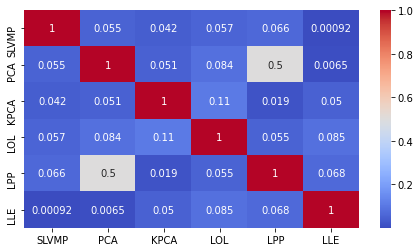

In [43]:
import seaborn as sns
# data = coil2000()
# dim = Dim(data.train, data.test, data.col_names)
# dim.apply_dim(num_dim=5)
df = dim.get_corr_table(1)
df = df.droplevel(3, axis=1)
df = df.droplevel(0, axis=1)
df= df.drop(
    [('SLMVP', 'Polynomial-Order=5'),
    ('SLMVP',             'Linear'),
    ('SLMVP', 'Radial-Gammas=0.01'),
    ( 'KPCA', 'Polynomial-Order=5')],
      axis=1)
df = df.droplevel(1, axis=1)

#df.corr(method='spearman').style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(7.5,4))
col_labels = ['SLVMP','PCA','KPCA','LOL','LPP', 'LLE']
sns.heatmap(df.corr(method='spearman').abs(), annot=True, cmap='coolwarm',
             xticklabels=col_labels, yticklabels=col_labels)
#             vmin=0, vmax=0.55)

#plt.savefig('plots/heatmap_artificial.png', dpi=300, bbox_inches='tight')

In [36]:
df.corr(method='spearman').abs()

SLMVP       PCA               KPCA  \
                         Radial-Gammas=0.1           Radial-Gamma=0.003   
SLMVP Radial-Gammas=0.1           1.000000  0.055234           0.042236   
PCA                               0.055234  1.000000           0.050969   
KPCA  Radial-Gamma=0.003          0.042236  0.050969           1.000000   
LOL                               0.056780  0.083778           0.106821   
LPP   k=17                        0.065667  0.500559           0.019186   
LLE   k=30-reg=0.001              0.000924  0.006485           0.050444   

                               LOL       LPP            LLE  
                                        k=17 k=30-reg=0.001  
SLMVP Radial-Gammas=0.1   0.056780  0.065667       0.000924  
PCA                       0.083778  0.500559       0.006485  
KPCA  Radial-Gamma=0.003  0.106821  0.019186       0.050444  
LOL                       1.000000  0.055059       0.084618  
LPP   k=17                0.055059  1.000000       0.067825  
LLE   k=30-reg=0.001      0.084618  0.067825       1.000000

In [13]:
dim.apply_clf('Linear Regression')

Linear Reg.: 100%|██████████| 12/12 [00:00<00:00, 37.99it/s]


Best Score Params Dimensions Dim. Technique         Dim. Params
9     0.992841              7Dim            LOL                    
2     0.990829              7Dim          SLMVP  Radial-Gammas=0.01
3     0.989562              7Dim          SLMVP   Radial-Gammas=0.1
1     0.958516              7Dim          SLMVP              Linear
4     0.956879              7Dim          SLMVP     Radial-Gammas=1
0     0.927235              7Dim          SLMVP  Polynomial-Order=5
10    0.377318              7Dim            LPP                k=17
5     0.304909              7Dim            PCA                    
6     0.273830              7Dim           KPCA  Polynomial-Order=5
11    0.267361              7Dim            LLE      k=30-reg=0.001
8    -0.010269              7Dim           KPCA  Radial-Gamma=0.003
7    -0.023228              7Dim           KPCA    Radial-Gamma=0.1

In [ ]:
dim.apply_clf('XGBoost')

# Other

In [11]:
import pandas as pd

df = pd.DataFrame.from_dict(dim.scores, orient='index', columns=['Best Score', 'Params']).reset_index()
df[['Model', 'Dimensions', 'Dim. Technique', 'Dim. Params']] = df["index"].str.split("-", n = 3, expand = True)
df

index  Best Score  \
0   XGBoost-1Dim-SLMVP-Polynomial-Order=5    0.930472   
1               XGBoost-1Dim-SLMVP-Linear    0.930472   
2   XGBoost-1Dim-SLMVP-Radial-Gammas=0.01    0.930472   
3    XGBoost-1Dim-SLMVP-Radial-Gammas=0.1    0.930472   
4      XGBoost-1Dim-SLMVP-Radial-Gammas=1    0.930472   
..                                    ...         ...   
60          XGBoost-50Dim-KPCA-Polynomial    0.927039   
61              XGBoost-50Dim-KPCA-Radial    0.927039   
62                      XGBoost-50Dim-LOL    0.927039   
63                 XGBoost-50Dim-LPP-k=68    0.926180   
64       XGBoost-50Dim-LLE-k=68-reg=0.001    0.928755   

                       Params    Model Dimensions Dim. Technique  \
0    {'xgb__n_estimators': 5}  XGBoost       1Dim          SLMVP   
1    {'xgb__n_estimators': 5}  XGBoost       1Dim          SLMVP   
2    {'xgb__n_estimators': 5}  XGBoost       1Dim          SLMVP   
3    {'xgb__n_estimators': 5}  XGBoost       1Dim          SLMVP   
4    {'xgb__n_estimators': 5}  XGBoost       1Dim          SLMVP   
..                        ...      ...        ...            ...   
60   {'xgb__n_estimators': 5}  XGBoost      50Dim           KPCA   
61   {'xgb__n_estimators': 5}  XGBoost      50Dim           KPCA   
62  {'xgb__n_estimators': 10}  XGBoost      50Dim            LOL   
63  {'xgb__n_estimators': 10}  XGBoost      50Dim            LPP   
64  {'xgb__n_estimators': 10}  XGBoost      50Dim            LLE   

           Dim. Params  
0   Polynomial-Order=5  
1               Linear  
2   Radial-Gammas=0.01  
3    Radial-Gammas=0.1  
4      Radial-Gammas=1  
..                 ...  
60          Polynomial  
61              Radial  
62                None  
63                k=68  
64      k=68-reg=0.001  

[65 rows x 7 columns]

In [13]:
df.sort_values('Best Score').groupby('Dim. Technique', as_index=False).first()

Dim. Technique                                  index  Best Score  \
0           KPCA              XGBoost-50Dim-KPCA-Radial    0.927039   
1            LLE       XGBoost-50Dim-LLE-k=68-reg=0.001    0.928755   
2            LOL                      XGBoost-50Dim-LOL    0.927039   
3            LPP                 XGBoost-50Dim-LPP-k=68    0.926180   
4            PCA                      XGBoost-10Dim-PCA    0.928755   
5          SLMVP  XGBoost-10Dim-SLMVP-Radial-Gammas=0.1    0.924464   

                      Params    Model Dimensions        Dim. Params  
0   {'xgb__n_estimators': 5}  XGBoost      50Dim             Radial  
1  {'xgb__n_estimators': 10}  XGBoost      50Dim     k=68-reg=0.001  
2  {'xgb__n_estimators': 10}  XGBoost      50Dim               None  
3  {'xgb__n_estimators': 10}  XGBoost      50Dim               k=68  
4  {'xgb__n_estimators': 10}  XGBoost      10Dim               None  
5  {'xgb__n_estimators': 10}  XGBoost      10Dim  Radial-Gammas=0.1

In [20]:
best_performing = df[df.Dimensions == '1Dim'].sort_values('Best Score')\
    .groupby('Dim. Technique', as_index=False)\
    .first()['index'].to_list()
best_performing = [x[8:] for x in best_performing]

best_performing

['1Dim-KPCA-Linear',
 '1Dim-LLE-k=68-reg=0.001',
 '1Dim-LOL',
 '1Dim-LPP-k=68',
 '1Dim-PCA',
 '1Dim-SLMVP-Polynomial-Order=5']

In [22]:
dim.get_corr_table()[best_performing].to_csv('corr_1dim')

In [9]:
df.groupby(['Dim. Technique']).max('Best Score')

Best Score
Dim. Technique            
KPCA              0.931330
LLE               0.930472
LOL               0.930472
LPP               0.930472
PCA               0.930472
SLMVP             0.931330

# Other Datasets

### ORL

In [2]:
from datasets import orl

orl = orl()

X_train, X_test, y_train, y_test = train_test_split(orl.X, orl.y, test_size=0.1, random_state=33)

dim = Dim()
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

# ['auto'|'brute'|'kd_tree'|'ball_tree']
#dim.apply_dim(num_dim=[1], tflag=[7, 11])
dim.apply_dim(num_dim=[2], tflag=[3, 6, 7, 11])
#dim.apply_dim(num_dim=[5], tflag=[1,2,3,5,6,7,8,9,10,11,12])

('2Dim', 'LLE', 'k=18-reg=0.001'): 100%|██████████| 1/1 [00:09<00:00,  9.31s/it]


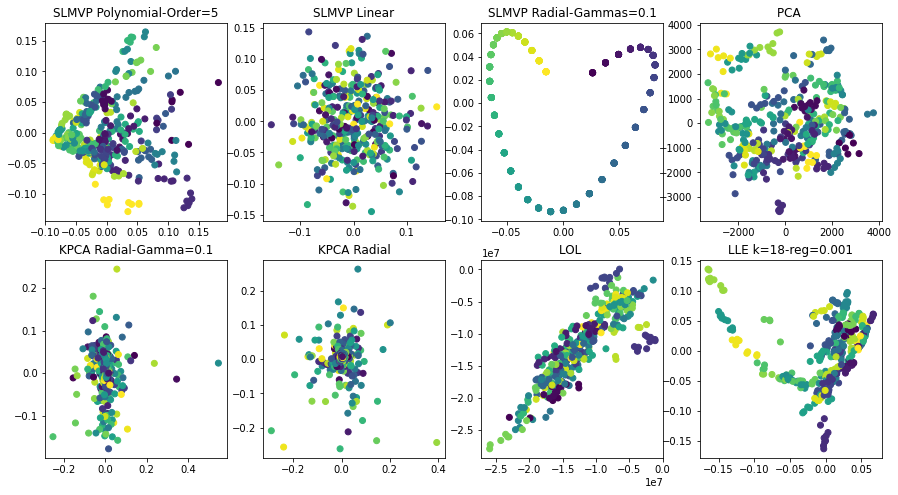

In [3]:
#dim.apply_dim(num_dim=[2], tflag=[6,7,8,11])
dim.plot_artificial(n_rows=2, n_cols=4, figsize=(15, 8))

In [4]:
dim.apply_clf().head(5)

AdaBoost: 100%|██████████| 8/8 [01:47<00:00, 13.43s/it]

saved as 07-13-18:58(.csv)(.xlsx)


Model  Accuracy                                            Params  \
22            SVM     0.650              {'svm__C': 10, 'svm__kernel': 'rbf'}   
39    Naive Bayes     0.625                                                {}   
54            LDA     0.575                            {'lda__solver': 'svd'}   
47  Random Forest     0.575     {'rf__max_depth': 20, 'rf__n_estimators': 50}   
46  Random Forest     0.550  {'rf__max_depth': None, 'rf__n_estimators': 200}   

      MAE Dimensions Dim. Technique     Dim. Params  
22  4.800       2Dim            LOL                  
39  6.100       2Dim            LLE  k=18-reg=0.001  
54  7.550       2Dim            LOL                  
47  4.350       2Dim            LLE  k=18-reg=0.001  
46  5.375       2Dim            LOL

#### Hbar Plot

1 dim

100%|██████████| 1/1 [00:00<00:00, 64.89it/s]


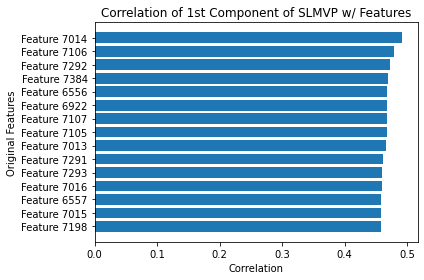

In [14]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[1], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(1)

# Sample data

values = df[('1Dim', 'SLMVP',  'Radial-Gammas=0.1', 0)].sort_values(ascending=True)[-15:]
categories = ['Feature ' + str(i) for i in values.index]
# Create horizontal bar plot
plt.barh(categories, values)
# Add labels and title

plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 1st Component of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_orl.png')

5 dim

100%|██████████| 1/1 [00:00<00:00, 42.75it/s]


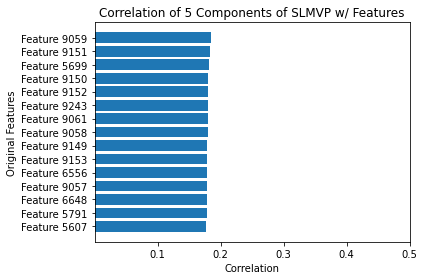

In [15]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[5], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(5)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

# Sample data

values = df[('5Dim', 'SLMVP',  'Radial-Gammas=0.1')].sort_values(ascending=True)[-15:]
categories = ['Feature ' + str(i) for i in values.index]
# Create horizontal bar plot
plt.barh(categories, values)
# Add labels and title
plt.xticks([0.1,0.2,0.3,0.4,0.5])
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 5 Components of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_orl_5dim.png')

20 dim

100%|██████████| 1/1 [00:00<00:00, 13.12it/s]


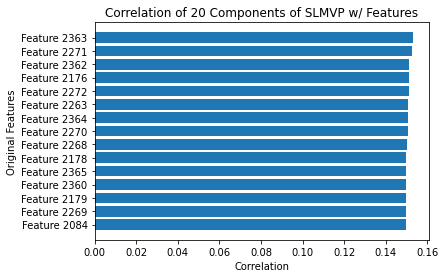

In [4]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[20], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(20)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

# Sample data

values = df[('20Dim', 'SLMVP',  'Radial-Gammas=0.1')].sort_values(ascending=True)[-15:]
categories = ['Feature ' + str(i) for i in values.index]
# Create horizontal bar plot
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 20 Components of SLMVP w/ Features')
plt.savefig('plots/hbar_orl_20dim.png')

#### Heat Map 

100%|██████████| 10/10 [00:00<00:00, 155.83it/s]


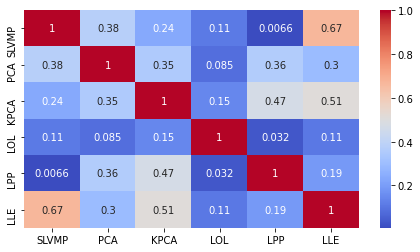

In [23]:
df = dim.get_corr_table(1)
df = df.droplevel(3, axis=1)
df = df.droplevel(0, axis=1)
df= df.drop(
    [('SLMVP',             'Linear'),
    ('SLMVP', 'Radial-Gammas=0.01'),
    ('KPCA',             'Radial-Gamma=0.1'),
    ('KPCA',             'Linear')],
      axis=1)
df = df.droplevel(1, axis=1)
plt.figure(figsize=(7.5,4))
col_labels = ['SLVMP','PCA','KPCA','LOL','LPP', 'LLE']
sns.heatmap(df.corr(method='spearman').abs(), annot=True, cmap='coolwarm',
             xticklabels=col_labels, yticklabels=col_labels)

plt.savefig('plots/heatmap_orl.png', dpi=300, bbox_inches='tight')

In [5]:
df

SLMVP       PCA      KPCA      KPCA       LOL       LLE
0      0.135293  0.314194  0.040066  0.050665  0.445460  0.321015
1      0.134646  0.315344  0.042558  0.049225  0.443209  0.321252
2      0.133855  0.318281  0.043385  0.052024  0.446094  0.321275
3      0.132991  0.317792  0.042867  0.049074  0.444887  0.323188
4      0.134526  0.316575  0.039035  0.049354  0.448265  0.323247
...         ...       ...       ...       ...       ...       ...
10299  0.144572  0.232976  0.043424  0.038513  0.344542  0.161938
10300  0.128655  0.254307  0.036441  0.018421  0.412925  0.195025
10301  0.118997  0.271201  0.021978  0.026663  0.444516  0.215370
10302  0.128434  0.262417  0.033211  0.028731  0.438685  0.221458
10303  0.128457  0.270457  0.042073  0.031160  0.425876  0.216521

[10304 rows x 6 columns]

In [6]:
df.columns

Index(['SLMVP', 'PCA', 'KPCA', 'KPCA', 'LOL', 'LLE'], dtype='object')

100%|██████████| 8/8 [00:00<00:00, 17.55it/s]


MultiIndex([('SLMVP', 'Polynomial-Order=5'),
            ('SLMVP',             'Linear'),
            ('SLMVP',  'Radial-Gammas=0.1'),
            (  'PCA',                   ''),
            ( 'KPCA',   'Radial-Gamma=0.1'),
            ( 'KPCA',             'Radial'),
            (  'LOL',                   ''),
            (  'LLE',     'k=18-reg=0.001')],
           )


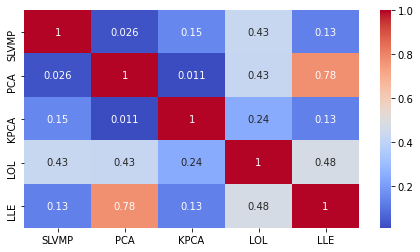

In [8]:
# Heatmap with multiple dimensions

df = dim.get_corr_table(5)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

df = df.droplevel(0, axis=1)
print(df.columns)
df= df.drop(
    [('SLMVP',             'Linear'),
     ('SLMVP', 'Polynomial-Order=5'),
     ( 'KPCA',             'Radial')],
      axis=1)
df = df.droplevel(1, axis=1)

#df.corr(method='spearman').style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(7.5,4))
col_labels = ['SLVMP','PCA','KPCA','LOL','LLE']
sns.heatmap(df.corr(method='spearman').abs(), annot=True, cmap='coolwarm',
             xticklabels=col_labels, yticklabels=col_labels)
#             vmin=0, vmax=0.55)

plt.savefig('plots/heatmap_orl_5dim.png', dpi=300, bbox_inches='tight')

#### Classification

In [ ]:
dim.apply_clf().head(5)

In [22]:
df = pd.read_csv('scores/07-04-15:04.csv', index_col=0)
if 'Best Score' in df.columns:
    df = df.rename(columns = {'Best Score':'Accuracy'})
df['Dimensions'] = df['Dimensions'].str[:-3].astype(int)


max_value_mask = df.groupby(['Dim. Technique', 'Dimensions'])['Accuracy'].idxmax()
df = df.loc[max_value_mask]
df = df.set_index('Dimensions').sort_values(['Dimensions','Accuracy'], ascending=[1,0])
df = df[['Dim. Technique', 'Dim. Params', 'Model', 'Accuracy']]

#print(df.to_latex(na_rep=''))
df

Dim. Technique         Dim. Params          Model  Accuracy
Dimensions                                                            
1                     LLE      k=18-reg=0.001            KNN     0.300
1                    KPCA              Linear  Random Forest     0.200
1                     PCA                 NaN        XGBoost     0.175
1                     LOL                 NaN        XGBoost     0.125
1                   SLMVP  Radial-Gammas=0.01    Naive Bayes     0.125
3                    KPCA              Linear            SVM     0.750
3                     LLE      k=18-reg=0.001            SVM     0.750
3                     PCA                 NaN            SVM     0.750
3                     LOL                 NaN            KNN     0.525
3                   SLMVP  Polynomial-Order=5        XGBoost     0.300
5                     LOL                 NaN            SVM     0.925
5                    KPCA              Linear            SVM     0.900
5                     PCA                 NaN            SVM     0.900
5                     LLE      k=18-reg=0.001            KNN     0.850
5                   SLMVP  Polynomial-Order=5  Random Forest     0.325
15                   KPCA              Linear            SVM     0.975
15                    LOL                 NaN            SVM     0.975
15                    PCA                 NaN            SVM     0.975
15                    LLE      k=18-reg=0.001            SVM     0.925
15                  SLMVP   Radial-Gammas=0.1    Naive Bayes     0.750
30                   KPCA              Linear            SVM     1.000
30                    LOL                 NaN            LDA     1.000
30                    PCA                 NaN            SVM     1.000
30                    LLE      k=18-reg=0.001  Random Forest     0.950
30                  SLMVP   Radial-Gammas=0.1    Naive Bayes     0.925

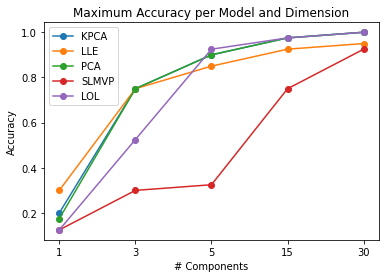

In [7]:
df = pd.read_csv('scores/07-04-15:04.csv', index_col=0)
if 'Best Score' in df.columns:
    df = df.rename(columns = {'Best Score':'Accuracy'})
df['Dimensions'] = df['Dimensions'].str[:-3].astype(int)


max_value_mask = df.groupby(['Dim. Technique', 'Dimensions'])['Accuracy'].idxmax()
df = df.loc[max_value_mask]
df = df.set_index('Dimensions').sort_values(['Dimensions','Accuracy'], ascending=[1,0])
df = df[['Dim. Technique', 'Dim. Params', 'Model', 'Accuracy']]

x_values = [1, 2, 3, 4, 5]
x_values = ['1', '3', '5', '15', '30']
techniques = ['KPCA', 'LLE', 'PCA', 'SLMVP', 'LOL']

for tech in techniques:
    plt.plot(x_values, df[df['Dim. Technique'] == tech]['Accuracy'], marker='o', label=tech)

# Adding labels and title
plt.xticks(x_values)
plt.xlabel('# Components')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy per Model and Dimension')
plt.legend()
plt.savefig('plots/orl_line_chart.png')
plt.show()

#### 2D/3D Visualization

('2Dim', 'LLE', 'k=18-reg=0.001'): 100%|██████████| 1/1 [00:12<00:00, 12.60s/it]


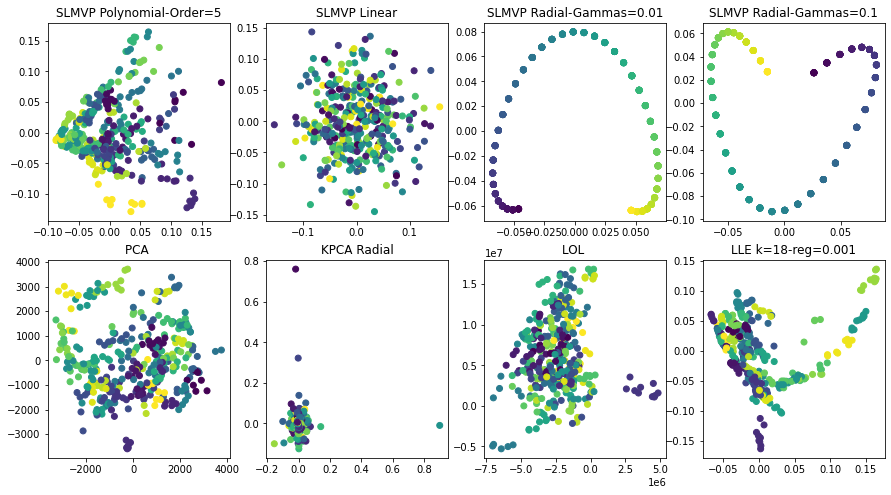

In [14]:
from datasets import orl

orl = orl()

X_train, X_test, y_train, y_test = train_test_split(orl.X, orl.y, test_size=0.1, random_state=33)

dim = Dim()
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

# ['auto'|'brute'|'kd_tree'|'ball_tree']
dim.apply_dim(num_dim=[2], tflag=[6,7,8,11])
dim.plot_artificial(n_rows=2, n_cols=4, figsize=(15, 8), save_name='orl_2d')

('3Dim', 'LLE', 'k=18-reg=0.001'): 100%|██████████| 1/1 [00:12<00:00, 12.93s/it]


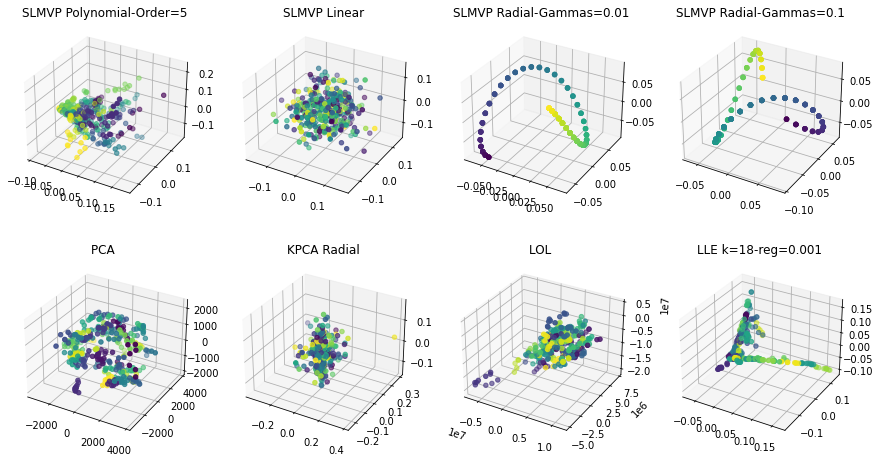

In [15]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[3], tflag=[6,7,8,11])
dim.plot_artificial_3D(n_rows=2, n_cols=4, figsize=(15, 8), save_name='orl_3d')

### FIFA

In [3]:
from datasets import fifa

fifa = fifa()

X_train, X_test, y_train, y_test = train_test_split(fifa.X, fifa.y, test_size=0.1, random_state=33)

dim = Dim()
dim.col_names = fifa.col_names
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test
dim.new_dim = dict()
#dim.apply_dim(num_dim=[1], tflag=[3,6,7,8])
#dim.apply_dim(num_dim=[20], tflag=[1,2,3,5,6,7,8,9,10,11,12])

#### Hbar Plot

with negatives

In [ ]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[2], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(2, abs=False)

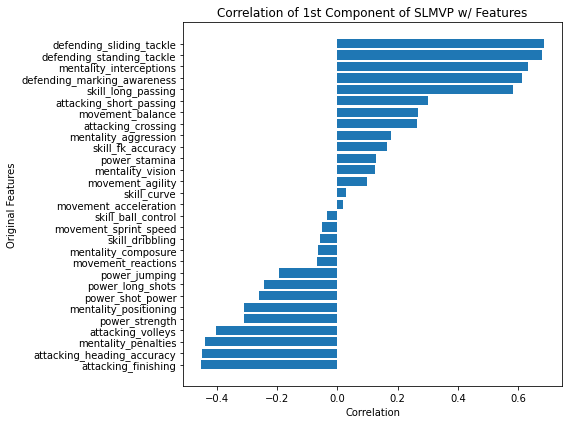

In [17]:
# First Component

values = df[('2Dim', 'SLMVP',  'Radial-Gammas=0.1', 0)].sort_values(ascending=True)#[-20:]
categories = values.index
# Create horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 1st Component of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_fifa_neg1.png')

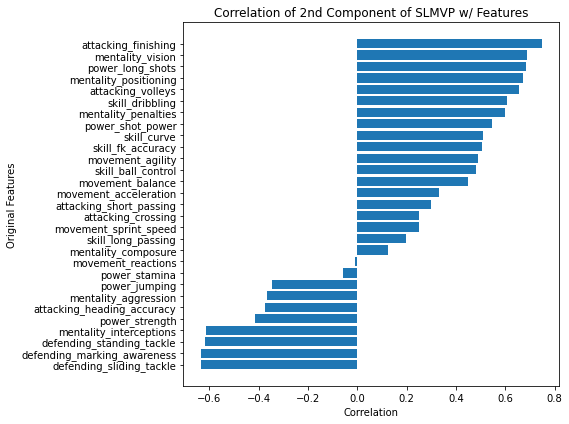

In [16]:
# Second Component

values = df[('2Dim', 'SLMVP',  'Radial-Gammas=0.1', 1)].sort_values(ascending=True)#[-20:]
categories = values.index
# Create horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 2nd Component of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_fifa_neg2.png')

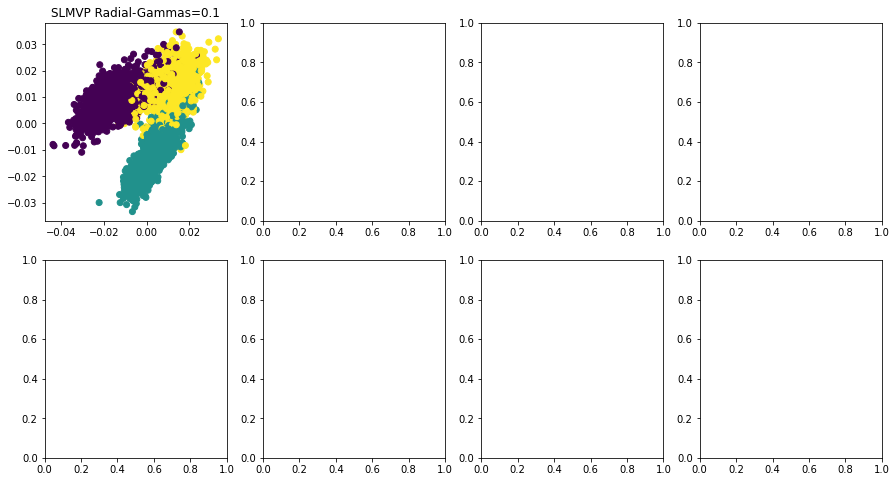

In [13]:
dim.plot_artificial(n_rows=2, n_cols=4, figsize=(15, 8)) 

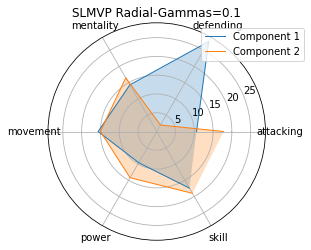

In [15]:
df_rank = df.rank(ascending=True).reset_index()
df_rank['skill set'] = df_rank['index'].str.split('_', n=1).str[0]
df_rank = df_rank.set_index('index')
df_spider = df_rank.groupby('skill set').mean()
df_spider = df_spider.droplevel(0, axis=1)
df_spider= df_spider[('SLMVP',  'Radial-Gammas=0.1')]

# Data for the spider plot
categories = df_spider.index.to_list()
data1 = df_spider[0].to_numpy()  # Values for the first dataset
data2 = df_spider[1].to_numpy()  # Values for the second dataset

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()


# Make the plot figure
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'polar': True})

# Plot the first dataset
ax.plot(angles, data1, linewidth=1, linestyle='solid', label='Component 1')
ax.fill(angles, data1, alpha=0.25)

# Plot the second dataset
ax.plot(angles, data2, linewidth=1, linestyle='solid', label='Component 2')
ax.fill(angles, data2, alpha=0.25)

# Set the angle labels
ax.set_xticks(angles)
ax.set_xticklabels(categories)

# Set the y-axis limit
#ax.set_ylim(0, 1)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Add a title
plt.title('SLMVP Radial-Gammas=0.1')

# Show the plot
plt.show()
#plt.savefig('plots/spider_SLMVP_radial.png')

1 dim

100%|██████████| 1/1 [00:00<00:00, 360.52it/s]


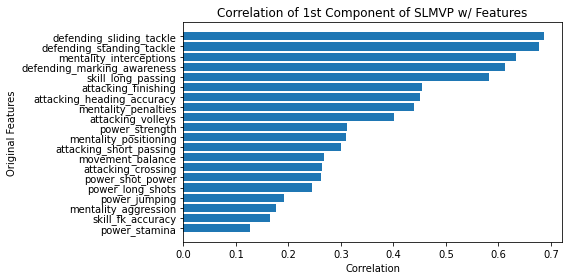

In [13]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[1], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(1)

# Sample data

values = df[('1Dim', 'SLMVP',  'Radial-Gammas=0.1', 0)].sort_values(ascending=True)[-20:]
categories = values.index
# Create horizontal bar plot
plt.figure(figsize=(8, 4))
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 1st Component of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_fifa.png')

5 dim

100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


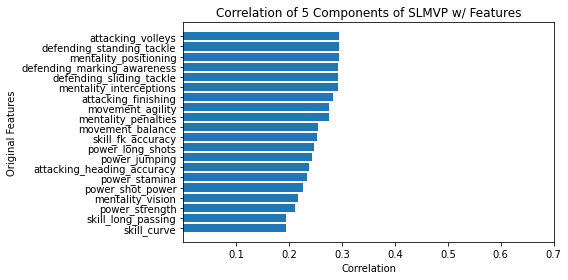

In [3]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[5], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(5)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

# Sample data

values = df[('5Dim', 'SLMVP',  'Radial-Gammas=0.1')].sort_values(ascending=True)[-20:]
categories = values.index
# Create horizontal bar plot
plt.figure(figsize=(8, 4))
plt.barh(categories, values)
# Add labels and title
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 5 Components of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_fifa_5dim.png')

20 dim

100%|██████████| 1/1 [00:00<00:00, 14.25it/s]


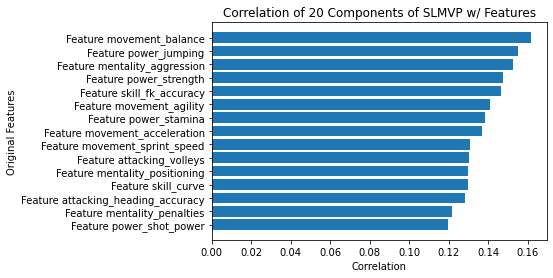

<Figure size 432x288 with 0 Axes>

In [3]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[20], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(20)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

# Sample data

values = df[('20Dim', 'SLMVP',  'Radial-Gammas=0.1')].sort_values(ascending=True)[-15:]
categories = ['Feature ' + str(i) for i in values.index]
# Create horizontal bar plot
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 20 Components of SLMVP w/ Features')
plt.savefig('plots/hbar_fifa_20dim.png')

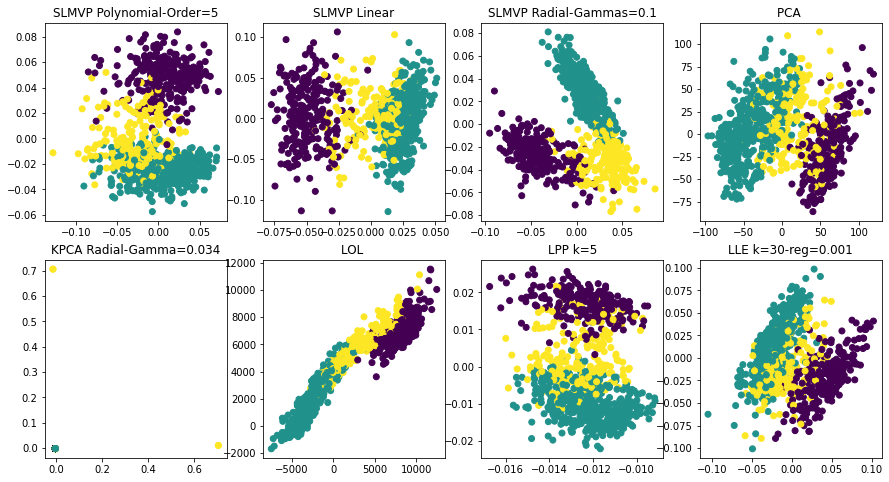

In [5]:
dim.plot_artificial(n_rows=2, n_cols=4, figsize=(15, 8), save_name='fifa_2d.png') 

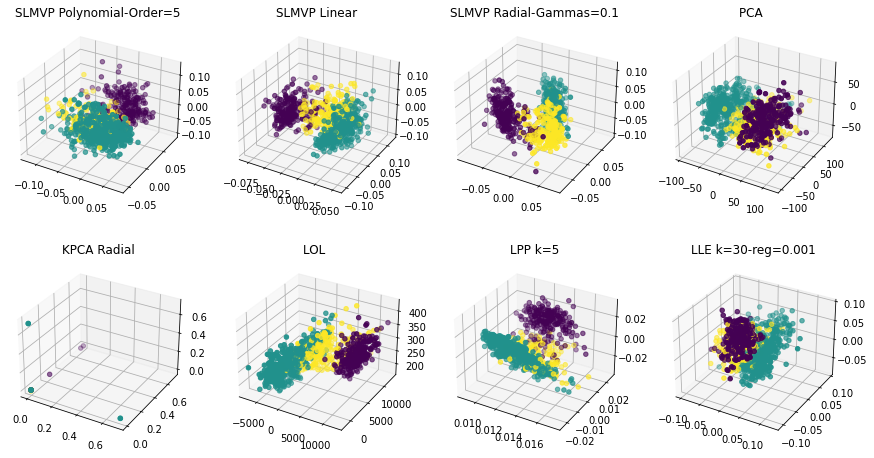

In [3]:
dim.plot_artificial_3D(n_rows=2, n_cols=4, figsize=(15, 8), save_name='fifa_3d') 

#### Classification Results

In [9]:
dim.apply_clf().head(5)

AdaBoost: 100%|██████████| 55/55 [17:26<00:00, 19.02s/it]


saved as 07-04-20:42(.csv)(.xlsx)


Model  Accuracy                                        Params  \
25         XGBoost      0.96                     {'xgb__n_estimators': 20}   
310  Random Forest      0.96  {'rf__max_depth': 5, 'rf__n_estimators': 50}   
14         XGBoost      0.96                     {'xgb__n_estimators': 10}   
91             KNN      0.95                     {'knn__n_neighbors': 100}   
68             KNN      0.95                     {'knn__n_neighbors': 100}   

      MAE Dimensions Dim. Technique         Dim. Params  
25   0.05       3Dim          SLMVP   Radial-Gammas=0.1  
310  0.04       4Dim          SLMVP  Radial-Gammas=0.01  
14   0.05       2Dim          SLMVP   Radial-Gammas=0.1  
91   0.06       4Dim          SLMVP   Radial-Gammas=0.1  
68   0.06       2Dim          SLMVP  Radial-Gammas=0.01

In [3]:
dim.apply_clf().head(5)

AdaBoost: 100%|██████████| 45/45 [22:45<00:00, 30.35s/it]


saved as 06-17-18:48(.csv)(.xlsx)


Model  Best Score                     Params Dimensions  \
44         XGBoost    0.949315  {'xgb__n_estimators': 10}       5Dim   
35         XGBoost    0.946575   {'xgb__n_estimators': 5}       4Dim   
89             KNN    0.943836   {'knn__n_neighbors': 20}       5Dim   
80             KNN    0.941096   {'knn__n_neighbors': 50}       4Dim   
179  Decision Tree    0.939726       {'dt__max_depth': 5}       5Dim   

    Dim. Technique     Dim. Params  
44             LLE  k=81-reg=0.001  
35             LLE  k=81-reg=0.001  
89             LLE  k=81-reg=0.001  
80             LLE  k=81-reg=0.001  
179            LLE  k=81-reg=0.001

In [3]:

df
#print(df.to_latex(na_rep=''))

Dim. Technique         Dim. Params          Model  Accuracy
Dimensions                                                            
1                   SLMVP              Linear            KNN      0.86
1                     LOL                 NaN    Naive Bayes      0.85
1                    KPCA              Linear            LDA      0.83
1                     PCA                 NaN            LDA      0.83
1                     LLE      k=30-reg=0.001       AdaBoost      0.54
1                     LPP                 k=5            KNN      0.50
2                   SLMVP   Radial-Gammas=0.1        XGBoost      0.96
2                     LPP                 k=5  Random Forest      0.90
2                     LOL                 NaN            KNN      0.89
2                    KPCA              Linear  Decision Tree      0.84
2                     PCA                 NaN  Decision Tree      0.84
2                     LLE      k=30-reg=0.001  Random Forest      0.58
3                   SLMVP   Radial-Gammas=0.1        XGBoost      0.96
3                    KPCA              Linear            SVM      0.93
3                     LPP                 k=5            SVM      0.93
3                     PCA                 NaN            KNN      0.93
3                     LOL                 NaN            KNN      0.89
3                     LLE      k=30-reg=0.001            SVM      0.85
4                   SLMVP  Radial-Gammas=0.01  Random Forest      0.96
4                     LPP                 k=5        XGBoost      0.94
4                    KPCA              Linear            SVM      0.90
4                     PCA                 NaN            SVM      0.90
4                     LOL                 NaN            SVM      0.89
4                     LLE      k=30-reg=0.001            SVM      0.84
5                   SLMVP   Radial-Gammas=0.1            SVM      0.95
5                     LLE      k=30-reg=0.001            SVM      0.94
5                     LOL                 NaN        XGBoost      0.91
5                     LPP                 k=5            KNN      0.91
5                    KPCA              Linear            SVM      0.89
5                     PCA                 NaN            SVM      0.89

In [ ]:
print(df.to_latex(na_rep=''))

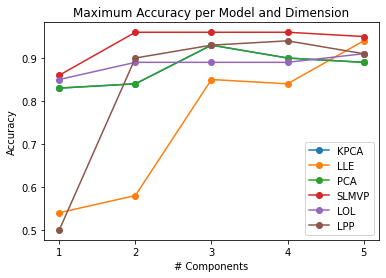

In [18]:
df = pd.read_csv('scores/07-04-20:42.csv', index_col=0)
if 'Best Score' in df.columns:
    df = df.rename(columns = {'Best Score':'Accuracy'})
df['Dimensions'] = df['Dimensions'].str[:-3].astype(int)


max_value_mask = df.groupby(['Dim. Technique', 'Dimensions'])['Accuracy'].idxmax()
df = df.loc[max_value_mask]
df = df.set_index('Dimensions').sort_values(['Dimensions','Accuracy'], ascending=[1,0])
df = df[['Dim. Technique', 'Dim. Params', 'Model', 'Accuracy']]

techniques = ['KPCA', 'LLE', 'PCA', 'SLMVP', 'LOL', 'LPP']

x_values = [1,2,3,4,5]

for tech in techniques:
    plt.plot(x_values, df[df['Dim. Technique'] == tech]['Accuracy'], marker='o', label=tech)

# Adding labels and title
plt.xticks(x_values)
plt.xlabel('# Components')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy per Model and Dimension')
plt.legend()
#plt.savefig('plots/fifa_line_chart.png')
plt.show()

#### Heatmap


100%|██████████| 8/8 [00:00<00:00, 186.68it/s]


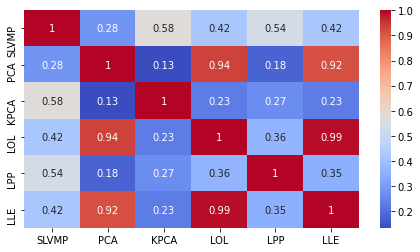

In [14]:
df = dim.get_corr_table(1)
df_heat = df.droplevel(0, axis=1)
df_heat= df_heat.drop(
    [('SLMVP', 'Polynomial-Order=5'),
    ('SLMVP',             'Linear')],
      axis=1)
df_heat = df_heat.droplevel(1, axis=1)
df_heat = df_heat.droplevel(1, axis=1)
#df.corr(method='spearman').style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(7.5,4))
col_labels = ['SLVMP','PCA','KPCA','LOL','LPP', 'LLE']
sns.heatmap(df_heat.corr(method='spearman').abs(), annot=True, cmap='coolwarm',
             xticklabels=col_labels, yticklabels=col_labels)
#             vmin=0, vmax=0.55)

#plt.savefig('plots/heatmap_fifa.png', dpi=300, bbox_inches='tight')

100%|██████████| 8/8 [00:00<00:00, 47.39it/s]


MultiIndex([('5Dim', 'SLMVP', 'Polynomial-Order=5'),
            ('5Dim', 'SLMVP',             'Linear'),
            ('5Dim', 'SLMVP',  'Radial-Gammas=0.1'),
            ('5Dim',   'PCA',                   ''),
            ('5Dim',  'KPCA',             'Radial'),
            ('5Dim',   'LOL',                   ''),
            ('5Dim',   'LPP',                'k=5'),
            ('5Dim',   'LLE',     'k=81-reg=0.001')],
           )


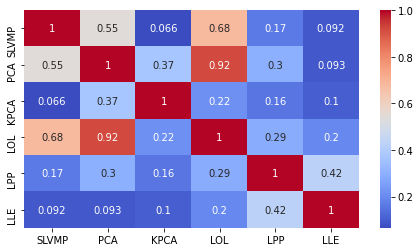

In [3]:
# Heatmap with multiple dimensions

df = dim.get_corr_table(5)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)
print(df.columns)
df = df.droplevel(0, axis=1)
df= df.drop(
    [('SLMVP',             'Linear'),
     ('SLMVP', 'Polynomial-Order=5')],
      axis=1)
df = df.droplevel(1, axis=1)

#df.corr(method='spearman').style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(7.5,4))
col_labels = ['SLVMP','PCA','KPCA','LOL','LPP', 'LLE']
sns.heatmap(df.corr(method='spearman').abs(), annot=True, cmap='coolwarm',
             xticklabels=col_labels, yticklabels=col_labels)
#             vmin=0, vmax=0.55)

plt.savefig('plots/heatmap_fifa_5dim.png', dpi=300, bbox_inches='tight')

#### Spider

In [5]:
df = dim.get_corr_table(2)
df_rank = df.rank(ascending=True).reset_index()
df_rank['skill set'] = df_rank['index'].str.split('_', n=1).str[0]
df_rank = df_rank.set_index('index')
df_spider = df_rank.groupby('skill set').mean()
df_spider = df_spider.droplevel(3, axis=1).droplevel(0, axis=1)
df_spider.columns = df_spider.columns.map(' '.join)
df_spider

100%|██████████| 11/11 [00:00<00:00, 76.79it/s]


SLMVP Polynomial-Order=5  SLMVP Polynomial-Order=5  SLMVP Linear  \
skill set                                                                     
attacking                 13.200000                 12.400000     12.400000   
defending                 25.000000                 27.666667     27.666667   
mentality                 14.166667                 13.833333     14.000000   
movement                  18.000000                 13.600000     13.800000   
power                     18.600000                 14.800000     14.600000   
skill                      5.200000                 13.000000     12.800000   

           SLMVP Linear  SLMVP Radial-Gammas=0.01  SLMVP Radial-Gammas=0.01  \
skill set                                                                     
attacking     13.800000                 11.000000                 18.800000   
defending     24.000000                 28.000000                  2.666667   
mentality     11.833333                 13.833333                 15.833333   
movement      19.400000                 16.200000                 15.600000   
power         16.800000                  9.000000                 13.800000   
skill          8.400000                 17.400000                 18.200000   

           SLMVP Radial-Gammas=0.1  SLMVP Radial-Gammas=0.1       PCA   \
skill set                                                                
attacking                10.800000                18.800000  18.400000   
defending                28.000000                 2.666667   2.333333   
mentality                13.833333                15.833333  16.000000   
movement                 16.000000                15.600000  15.200000   
power                     9.600000                13.800000  14.200000   
skill                    17.200000                18.200000  18.600000   

                PCA   KPCA Linear  KPCA Linear  KPCA Radial-Gamma=0.1  \
skill set                                                               
attacking  13.600000    18.400000    13.600000                   11.0   
defending  22.000000     2.333333    22.000000                   27.0   
mentality  16.833333    16.000000    16.833333                   13.0   
movement    9.000000    15.200000     9.000000                   19.6   
power      12.200000    14.200000    12.200000                   17.8   
skill      18.800000    18.600000    18.800000                    6.8   

           KPCA Radial-Gamma=0.1  KPCA Radial-Gamma=0.034  \
skill set                                                   
attacking              12.800000                11.200000   
defending               2.666667                27.000000   
mentality              11.000000                13.166667   
movement               20.600000                19.400000   
power                  18.200000                17.600000   
skill                  20.600000                 6.800000   

           KPCA Radial-Gamma=0.034       LOL        LOL     LPP k=5  \
skill set                                                             
attacking                10.400000  18.400000  18.400000  13.000000   
defending                 8.666667   2.333333   2.333333  28.000000   
mentality                15.500000  16.000000  15.666667  14.166667   
movement                 19.400000  15.800000  15.600000  16.800000   
power                    13.000000  14.400000  13.800000  16.600000   
skill                    20.400000  17.800000  19.000000   6.800000   

             LPP k=5  LLE k=30-reg=0.001  LLE k=30-reg=0.001  
skill set                                                     
attacking  18.400000           15.800000           10.200000  
defending   2.333333           20.333333           28.000000  
mentality  16.000000           16.833333           13.166667  
movement   16.000000           15.400000           16.800000  
power      14.400000           18.600000           15.600000  
skill      17.600000            4.800000           11.800000

In [7]:
df

2Dim                                \
                                         SLMVP                                 
                            Polynomial-Order=5              Linear             
                                             0         1         0         1   
attacking_crossing                   -0.776416  0.069266  0.071881 -0.544351   
attacking_finishing                  -0.519774 -0.748636 -0.787467 -0.473229   
attacking_heading_accuracy            0.111804 -0.043582 -0.078902 -0.094378   
attacking_short_passing              -0.620240  0.078747  0.085567 -0.616634   
attacking_volleys                    -0.560561 -0.699972 -0.699027 -0.551817   
skill_dribbling                      -0.694301 -0.330459 -0.367603 -0.529370   
skill_curve                          -0.812547 -0.260142 -0.255770 -0.636291   
skill_fk_accuracy                    -0.758491 -0.173916 -0.144206 -0.553664   
skill_long_passing                   -0.628245  0.337665  0.338685 -0.595850   
skill_ball_control                   -0.662306 -0.237771 -0.266737 -0.597677   
movement_acceleration                -0.305102 -0.207950 -0.189006 -0.164006   
movement_sprint_speed                -0.258525 -0.176066 -0.178114 -0.159172   
movement_agility                     -0.510859 -0.254625 -0.249847 -0.374903   
movement_reactions                   -0.497550 -0.019965 -0.008902 -0.562740   
movement_balance                     -0.319181 -0.147700 -0.108154 -0.081340   
power_shot_power                     -0.574630 -0.459748 -0.520489 -0.622055   
power_jumping                         0.193127  0.070977  0.057191  0.081563   
power_stamina                        -0.319162  0.172389  0.155579 -0.271433   
power_strength                        0.266272  0.015666 -0.007135  0.012528   
power_long_shots                     -0.684217 -0.528361 -0.577857 -0.646199   
mentality_aggression                 -0.145212  0.397773  0.403327 -0.404377   
mentality_interceptions              -0.104616  0.895621  0.897633 -0.178652   
mentality_positioning                -0.632446 -0.588699 -0.622003 -0.518796   
mentality_vision                     -0.769225 -0.272790 -0.293922 -0.702558   
mentality_penalties                  -0.432737 -0.671242 -0.674213 -0.316205   
mentality_composure                  -0.572921 -0.071839 -0.075803 -0.671909   
defending_marking_awareness          -0.088047  0.892941  0.896281 -0.178434   
defending_standing_tackle            -0.054158  0.920156  0.931595 -0.113202   
defending_sliding_tackle             -0.029907  0.945421  0.942559 -0.077560   

                                                                            \
                                                                             
                            Radial-Gammas=0.01           Radial-Gammas=0.1   
                                             0         1                 0   
attacking_crossing                    0.314537  0.268107          0.307747   
attacking_finishing                  -0.383970  0.798211         -0.403989   
attacking_heading_accuracy           -0.491504 -0.316335         -0.483331   
attacking_short_passing               0.299741  0.304772          0.292025   
attacking_volleys                    -0.337765  0.704058         -0.355424   
skill_dribbling                       0.001605  0.621935         -0.014035   
skill_curve                           0.065094  0.493527          0.052633   
skill_fk_accuracy                     0.162831  0.443084          0.151599   
skill_long_passing                    0.551090  0.205495          0.545776   
skill_ball_control                    0.006681  0.498051         -0.005812   
movement_acceleration                 0.065194  0.323935          0.057055   
movement_sprint_speed                 0.030790  0.261046          0.024230   
movement_agility                      0.131681  0.525004          0.118456   
movement_reactions                   -0.104941  0.011156         -0.105121 

In [10]:
df = dim.get_corr_table(2, abs=False)
df_rank = df.reset_index()
df_rank['skill set'] = df_rank['index'].str.split('_', n=1).str[0]
df_rank = df_rank.set_index('index')
df_spider = df_rank.groupby('skill set').mean()
df_spider = df_spider.droplevel(3, axis=1).droplevel(0, axis=1)
df_spider.columns = df_spider.columns.map(' '.join)
df_spider

100%|██████████| 11/11 [00:00<00:00, 75.17it/s]


SLMVP Polynomial-Order=5  SLMVP Polynomial-Order=5  SLMVP Linear  \
skill set                                                                     
attacking                 -0.473037                 -0.268835     -0.281590   
defending                 -0.057371                  0.919506      0.923478   
mentality                 -0.442860                 -0.051863     -0.060830   
movement                  -0.378243                 -0.161261     -0.146805   
power                     -0.223722                 -0.145815     -0.178543   
skill                     -0.711178                 -0.132925     -0.139126   

           SLMVP Linear  SLMVP Radial-Gammas=0.01  SLMVP Radial-Gammas=0.01  \
skill set                                                                     
attacking     -0.456082                 -0.119792                  0.351763   
defending     -0.123065                  0.603065                 -0.667040   
mentality     -0.465416                  0.019901                  0.191369   
movement      -0.268432                  0.079947                  0.315161   
power         -0.289119                 -0.189360                  0.099579   
skill         -0.582570                  0.157460                  0.452418   

           SLMVP Radial-Gammas=0.1  SLMVP Radial-Gammas=0.1      PCA   \
skill set                                                               
attacking                -0.128595                 0.348037  0.501818   
defending                 0.619712                -0.651872 -0.730098   
mentality                 0.015077                 0.191322  0.289467   
movement                  0.072015                 0.316958  0.441263   
power                    -0.191797                 0.094459  0.253299   
skill                     0.146032                 0.455555  0.560534   

               PCA   KPCA Linear  KPCA Linear  KPCA Radial-Gamma=0.1  \
skill set                                                              
attacking  0.397226     0.501818     0.397226              -0.080270   
defending  0.637576    -0.730098     0.637576               0.002594   
mentality  0.484032     0.289467     0.484032              -0.062087   
movement   0.260877     0.441263     0.260877              -0.040256   
power      0.353381     0.253299     0.353381              -0.040016   
skill      0.572143     0.560534     0.572143              -0.095474   

           KPCA Radial-Gamma=0.1  KPCA Radial-Gamma=0.034  \
skill set                                                   
attacking              -0.004895                -0.083681   
defending              -0.028259                 0.002785   
mentality              -0.009755                -0.064593   
movement                0.012340                -0.042039   
power                   0.003998                -0.041711   
skill                   0.010081                -0.099310   

           KPCA Radial-Gamma=0.034      LOL       LOL    LPP k=5   LPP k=5  \
skill set                                                                    
attacking                 0.006649  0.407128  0.475473 -0.590148  0.379217   
defending                 0.015646 -0.867062 -0.703808 -0.186025 -0.890992   
mentality                 0.027463  0.179442  0.270017 -0.558469  0.150420   
movement                  0.035744  0.332557  0.466358 -0.477353  0.317356   
power                     0.017517  0.193019  0.196202 -0.489457  0.166181   
skill                     0.036607  0.396250  0.577959 -0.719331  0.363230   

           LLE k=30-reg=0.001  LLE k=30-reg=0.001  
skill set                                          
attacking           -0.340897           -0.490985  
defending           -0.294664            0.687727  
mentality           -0.355464           -0.294266  
movement            -0.369403           -0.200477  
power               -0.186362           -0.320052  
skill               -0.622056           -0.421741

In [12]:
print(df_spider['SLMVP Radial-Gammas=0.1'].to_latex(na_rep=''))

\begin{tabular}{lrr}
\toprule
{} &  SLMVP Radial-Gammas=0.1 &  SLMVP Radial-Gammas=0.1 \\
skill set &                          &                          \\
\midrule
attacking &                -0.128595 &                 0.348037 \\
defending &                 0.619712 &                -0.651872 \\
mentality &                 0.015077 &                 0.191322 \\
movement  &                 0.072015 &                 0.316958 \\
power     &                -0.191797 &                 0.094459 \\
skill     &                 0.146032 &                 0.455555 \\
\bottomrule
\end{tabular}



In [36]:
df = dim.get_corr_table(2)
df_rank = df.rank(ascending=True).reset_index()
df_rank['skill set'] = df_rank['index'].str.split('_', n=1).str[0]
df_rank = df_rank.set_index('index')
df_spider = df_rank.groupby('skill set').mean()
df_spider = df_spider.droplevel(0, axis=1)
df_spider= df_spider['SLMVP']['Radial-Gammas=0.1']
#df_spider = df_spider.droplevel(3, axis=1).droplevel(0, axis=1)
#df_spider.columns = df_spider.columns.map(' '.join)

df_spider

100%|██████████| 11/11 [00:00<00:00, 87.06it/s]


0          1
skill set                      
attacking  19.600000  14.800000
defending  27.666667  23.333333
mentality  15.666667  18.166667
movement    7.200000   8.600000
power      14.600000  13.600000
skill      10.200000  14.200000

In [50]:
df_spider.keys()

MultiIndex([('SLMVP', 'Polynomial-Order=5', 0),
            ('SLMVP', 'Polynomial-Order=5', 1),
            ('SLMVP',             'Linear', 0),
            ('SLMVP',             'Linear', 1),
            ('SLMVP', 'Radial-Gammas=0.01', 0),
            ('SLMVP', 'Radial-Gammas=0.01', 1),
            ('SLMVP',  'Radial-Gammas=0.1', 0),
            ('SLMVP',  'Radial-Gammas=0.1', 1),
            (  'PCA',                   '', 0),
            (  'PCA',                   '', 1),
            ( 'KPCA',             'Linear', 0),
            ( 'KPCA',             'Linear', 1),
            ( 'KPCA',   'Radial-Gamma=0.1', 0),
            ( 'KPCA',   'Radial-Gamma=0.1', 1),
            ( 'KPCA', 'Radial-Gamma=0.034', 0),
            ( 'KPCA', 'Radial-Gamma=0.034', 1),
            (  'LOL',                   '', 0),
            (  'LOL',                   '', 1),
            (  'LPP',                'k=5', 0),
            (  'LPP',                'k=5', 1),
            (  'LLE',     'k=30-reg=0.00

100%|██████████| 11/11 [00:00<00:00, 67.36it/s]


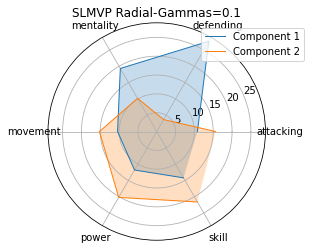

In [60]:
import matplotlib.pyplot as plt
import numpy as np

df = dim.get_corr_table(2)
df_rank = df.rank(ascending=True).reset_index()
df_rank['skill set'] = df_rank['index'].str.split('_', n=1).str[0]
df_rank = df_rank.set_index('index')
df_spider = df_rank.groupby('skill set').mean()
df_spider = df_spider.droplevel(0, axis=1)
df_spider= df_spider[('SLMVP','Linear')]

# Data for the spider plot
categories = df_spider.index.to_list()
data1 = df_spider[0].to_numpy()  # Values for the first dataset
data2 = df_spider[1].to_numpy()  # Values for the second dataset

# Number of variables
num_vars = len(categories)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()


# Make the plot figure
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'polar': True})

# Plot the first dataset
ax.plot(angles, data1, linewidth=1, linestyle='solid', label='Component 1')
ax.fill(angles, data1, alpha=0.25)

# Plot the second dataset
ax.plot(angles, data2, linewidth=1, linestyle='solid', label='Component 2')
ax.fill(angles, data2, alpha=0.25)

# Set the angle labels
ax.set_xticks(angles)
ax.set_xticklabels(categories)

# Set the y-axis limit
#ax.set_ylim(0, 1)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Add a title
plt.title('SLMVP Radial-Gammas=0.1')

# Show the plot
plt.show()
#plt.savefig('plots/spider_SLMVP_radial.png')


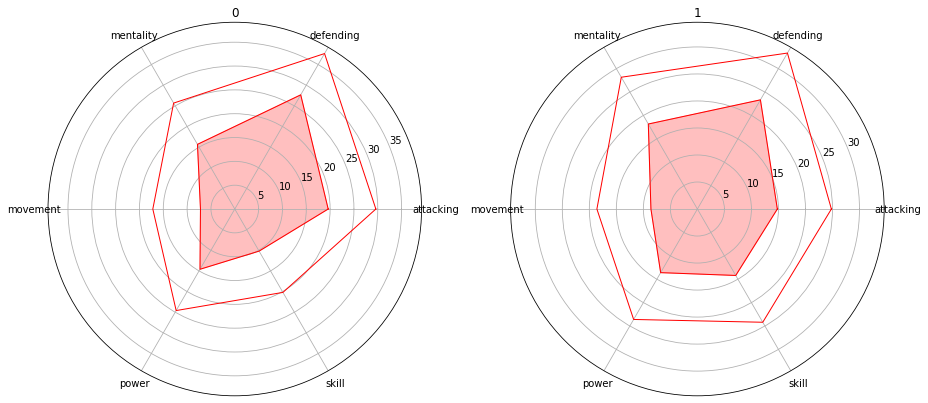

In [18]:
figsize = (13, 10)
n_rows = 1
n_cols = 2

# Create a figure and subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, subplot_kw={'projection': 'polar'})
#fig.suptitle('Radar Chart Subplots')
axs = axs.flatten()

# Get categories
categories = df_spider.index.to_list()

# Create radar charts for each subplot
for i, key in enumerate(list(df_spider.keys())):
    ax = axs[i]
    ax.set_title(key)

    # Calculate angle and normalize values
    values = df_spider[key].to_list()
    values += values[:1]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    # Plot the radar chart
    ax.plot(angles, values, color='red', linewidth=1)
    ax.fill(angles, values, color='red', alpha=0.25)
    ax.set_xticks(np.linspace(0, 2 * np.pi, len(categories), endpoint=False))
    ax.set_xticklabels(categories)

fig.tight_layout()

#plt.savefig('plots/spider_fifa.png', dpi=300, bbox_inches='tight')
plt.show()

#### Spider - Big plot

In [30]:
df_spider

SLMVP Polynomial-Order=5  SLMVP Polynomial-Order=5  SLMVP Linear  \
skill set                                                                     
attacking                  0.433872                  0.312441      0.264512   
defending                  0.143462                 -0.909547     -0.933666   
mentality                  0.429660                  0.083510      0.032471   
movement                   0.346434                  0.195470      0.162663   
power                      0.228060                  0.175934      0.170743   
skill                      0.690412                  0.194228      0.132219   

           SLMVP Linear  SLMVP Radial-Gammas=0.01  SLMVP Radial-Gammas=0.01  \
skill set                                                                     
attacking     -0.475223                  0.115808                 -0.324851   
defending     -0.083768                 -0.643357                  0.651915   
mentality     -0.442732                 -0.055767                 -0.180177   
movement      -0.092261                 -0.066856                 -0.310686   
power         -0.244836                  0.171086                 -0.101888   
skill         -0.634163                 -0.166564                 -0.445536   

           SLMVP Radial-Gammas=0.1  SLMVP Radial-Gammas=0.1      PCA   \
skill set                                                               
attacking                 0.124045                -0.321744  0.470396   
defending                -0.659644                 0.635449 -0.766736   
mentality                -0.051131                -0.181482  0.248720   
movement                 -0.058974                -0.312334  0.426176   
power                     0.173627                -0.097503  0.251832   
skill                    -0.155195                -0.449601  0.518299   

               PCA   KPCA Radial  KPCA Radial      LOL       LOL    LPP k=5  \
skill set                                                                     
attacking  0.421665     0.009244    -0.068224  0.376548  0.460389 -0.570293   
defending  0.592882     0.017743     0.009870 -0.885688 -0.713775 -0.233858   
mentality  0.500648     0.018018    -0.038799  0.141225  0.250991 -0.553875   
movement   0.282243     0.009682    -0.019152  0.320866  0.464569 -0.449586   
power      0.366093    -0.003174    -0.051199  0.189425  0.208263 -0.496876   
skill      0.606614     0.026498    -0.065166  0.359825  0.561051 -0.708820   

            LPP k=5  LLE k=30-reg=0.001  LLE k=30-reg=0.001  
skill set                                                    
attacking  0.357819           -0.491455           -0.296979  
defending -0.898946            0.685573           -0.610016  
mentality  0.120865           -0.301266           -0.409209  
movement   0.315382           -0.404677           -0.298597  
power      0.165222           -0.292871           -0.268080  
skill      0.338970           -0.527319           -0.505351

In [41]:
df_spider['SLMVP Polynomial-Order=5'].iloc[:,1]

skill set
attacking    0.312441
defending   -0.909547
mentality    0.083510
movement     0.195470
power        0.175934
skill        0.194228
Name: SLMVP Polynomial-Order=5, dtype: float64

In [33]:
df_rank.groupby('skill set').mean()

2Dim                                                   \
                       SLMVP                                                    
          Polynomial-Order=5              Linear           Radial-Gammas=0.01   
                           0         1         0         1                  0   
skill set                                                                       
attacking           0.433872  0.312441  0.264512 -0.475223           0.115808   
defending           0.143462 -0.909547 -0.933666 -0.083768          -0.643357   
mentality           0.429660  0.083510  0.032471 -0.442732          -0.055767   
movement            0.346434  0.195470  0.162663 -0.092261          -0.066856   
power               0.228060  0.175934  0.170743 -0.244836           0.171086   
skill               0.690412  0.194228  0.132219 -0.634163          -0.166564   

                                                                               \
                                                      PCA                KPCA   
                    Radial-Gammas=0.1                                  Radial   
                  1                 0         1         0         1         0   
skill set                                                                       
attacking -0.324851          0.124045 -0.321744  0.470396  0.421665  0.009244   
defending  0.651915         -0.659644  0.635449 -0.766736  0.592882  0.017743   
mentality -0.180177         -0.051131 -0.181482  0.248720  0.500648  0.018018   
movement  -0.310686         -0.058974 -0.312334  0.426176  0.282243  0.009682   
power     -0.101888          0.173627 -0.097503  0.251832  0.366093 -0.003174   
skill     -0.445536         -0.155195 -0.449601  0.518299  0.606614  0.026498   

                                                                            \
                          LOL                 LPP                      LLE   
                                              k=5           k=30-reg=0.001   
                  1         0         1         0         1              0   
skill set                                                                    
attacking -0.068224  0.376548  0.460389 -0.570293  0.357819      -0.491455   
defending  0.009870 -0.885688 -0.713775 -0.233858 -0.898946       0.685573   
mentality -0.038799  0.141225  0.250991 -0.553875  0.120865      -0.301266   
movement  -0.019152  0.320866  0.464569 -0.449586  0.315382      -0.404677   
power     -0.051199  0.189425  0.208263 -0.496876  0.165222      -0.292871   
skill     -0.065166  0.359825  0.561051 -0.708820  0.338970      -0.527319   

                     
                     
                     
                  1  
skill set            
attacking -0.296979  
defending -0.610016  
mentality -0.409209  
movement  -0.298597  
power     -0.268080  
skill     -0.505351

In [31]:
df = dim.get_corr_table(2, abs=False)
df_rank = df.reset_index()
df_rank['skill set'] = df_rank['index'].str.split('_', n=1).str[0]
df_rank = df_rank.set_index('index')
df_spider = df_rank.groupby('skill set').mean()
df_spider = df_spider.droplevel(0, axis=1)
df_spider.columns = [x[0] + ' ' + x[1] for x in df_spider.columns]

100%|██████████| 9/9 [00:00<00:00, 106.47it/s]


100%|██████████| 9/9 [00:00<00:00, 133.58it/s]


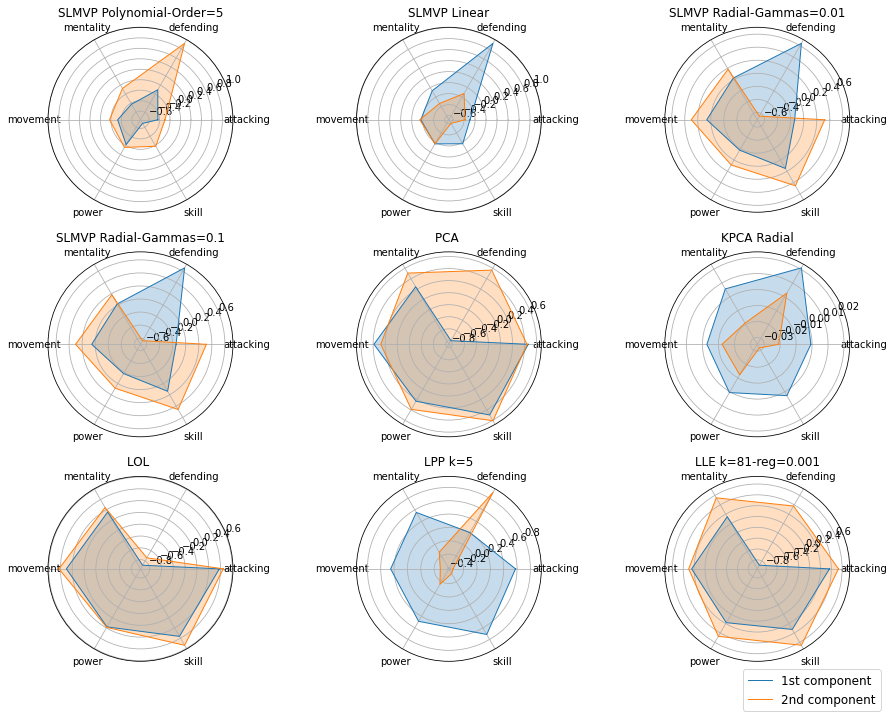

In [3]:
from datasets import fifa

fifa = fifa()
X_train, X_test, y_train, y_test = train_test_split(fifa.X, fifa.y, test_size=0.1, random_state=33)
dim = Dim()
dim.col_names = fifa.col_names
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test
dim.new_dim = dict()
dim.apply_dim(num_dim=[2], tflag=[6,7,8])

df = dim.get_corr_table(2, abs=False)
df_rank = df.reset_index()
df_rank['skill set'] = df_rank['index'].str.split('_', n=1).str[0]
df_rank = df_rank.set_index('index')
df_spider = df_rank.groupby('skill set').mean()
df_spider = df_spider.droplevel(0, axis=1)
df_spider.columns = [x[0] + ' ' + x[1] for x in df_spider.columns]

figsize = (13, 10)
n_rows = 3
n_cols = 3

# Create a figure and subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, subplot_kw={'projection': 'polar'})
#fig.suptitle('Radar Chart Subplots')
axs = axs.flatten()

# Get categories
categories = df_spider.index.to_list()

# Create radar charts for each subplot
for i, key in enumerate(list(df_spider.keys().unique())):
    ax = axs[i]
    ax.set_title(key)

    # Calculate angle and normalize values
    values = df_spider[key].iloc[:,0].to_list()
    values += values[:1]
    values2 = df_spider[key].iloc[:,1].to_list()
    values2 += values2[:1]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    # Plot the radar chart
    ax.plot(angles, values, linewidth=1, label='1st component')
    ax.fill(angles, values, alpha=0.25)
    # Plot the second dataset
    ax.plot(angles, values2, linewidth=1, label='2nd component')
    ax.fill(angles, values2, alpha=0.25)

    ax.set_xticks(np.linspace(0, 2 * np.pi, len(categories), endpoint=False))
    ax.set_xticklabels(categories)
axs[8].legend(loc='lower right', bbox_to_anchor=(1.2, -0.3), fontsize='large')

fig.tight_layout()

plt.savefig('plots/spider_fifa_2_comp_big.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
pd.read_csv(config['DATAFOLDER_PATH'] + 'fifa/players_22.csv')

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34   
1                   ST       92         92  119500000.0  270000.0   32   
2               ST, LW       91         91   45000000.0  270000.0   36   
3              LW, CAM       91         91  129000000.0  270000.0   29   
4              CM, CAM       91         91  125500000.0  350000.0   30   
...                ...      ...        ...          ...       ...  ...   
19234              CDM       47         52      70000.0    1000.0   22   
19235               CM       47         59     110000.0     500.0   19   
19236               CM       47         55     100000.0     500.0   21   
19237               ST       47         60     110000.0     500.0   19   
19238              CAM       47         60     110000.0     500.0   19   

              dob  height_cm  weight_kg  club_team_id            club_name  \
0      1987-06-24        170         72          73.0  Paris Saint-Germain   
1      1988-08-21        185         81          21.0    FC Bayern München   
2      1985-02-05        187         83          11.0    Manchester United   
3      1992-02-05        175         68          73.0  Paris Saint-Germain   
4      1991-06-28        181         70          10.0      Manchester City   
...           ...        ...        ...           ...                  ...   
19234  1999-01-02        180         64      112541.0             Wuhan FC   
19235  2002-03-18        175         70         445.0           Derry City   
19236  2000-02-07        178         72      111131.0           Finn Harps   
19237  2002-04-23        173         66      111131.0           Finn Harps   
19238  2002-02-06        167         61      113040.0  NorthEast United FC   

                          league_name  league_level club_position  \
0                      French Ligue 1           1.0            RW   
1                German 1. Bundesliga           1.0            ST   
2              English Premier League           1.0            ST   
3                      French Ligue 1           1.0            LW   
4              English Premier League           1.0           RCM   
...                               ...           ...           ...   
19234            Chinese Super League           1.0 

In [10]:
fifa.y

array([0, 0, 2, ..., 2, 0, 2])

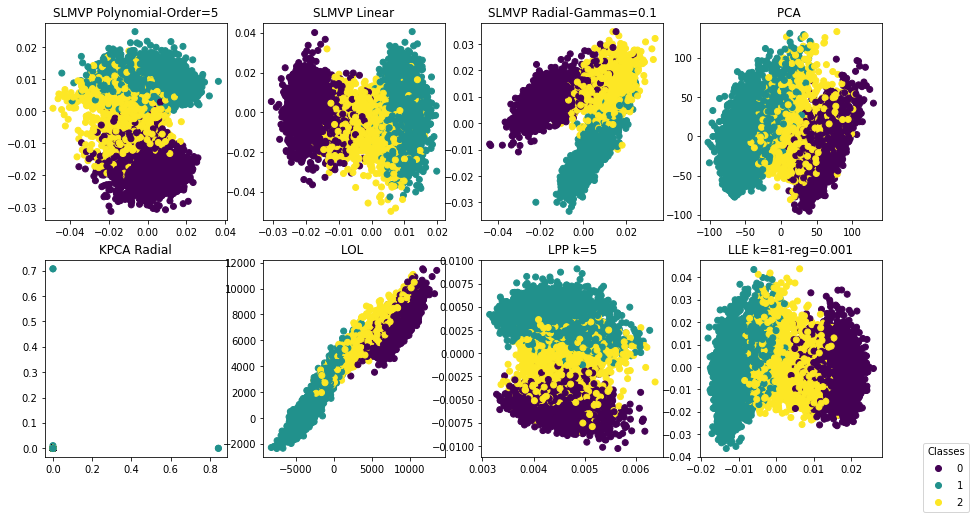

In [8]:
from math import floor

n_rows=2 
n_cols=4
figsize=(15, 8)

fig, ax = plt.subplots(
    n_rows, n_cols, figsize=figsize)
y = dim.y_train

for idx, key_dim in enumerate(list(dim.new_dim.keys())):
    scatter = ax[floor(idx/n_cols)][idx % n_cols].scatter(dim.new_dim[key_dim]
                                                [0][0], dim.new_dim[key_dim][0][1], c=y, label=y)
    ax[floor(idx/n_cols)][idx % n_cols].set_title(list(dim.new_dim.keys())
                                                    [idx][1] + ' ' + list(dim.new_dim.keys())[idx][2])
    
    if (floor(idx/n_cols) == 1) & (idx % n_cols == 3):
        legend1 = ax[1][3].legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes", bbox_to_anchor=(1.2, -0.3))

# ax[1][3].legend(loc='lower right', bbox_to_anchor=(1.2, -0.3), fontsize='large')
save_name = 'fifa_2d_big'
plt.savefig(
    '/Users/espina/Documents/TFM/tfm_code/plots/' + save_name + '.png')

In [6]:
del dim.new_dim[('2Dim', 'SLMVP', 'Radial-Gammas=0.01')]

100%|██████████| 9/9 [00:00<00:00, 393.93it/s]


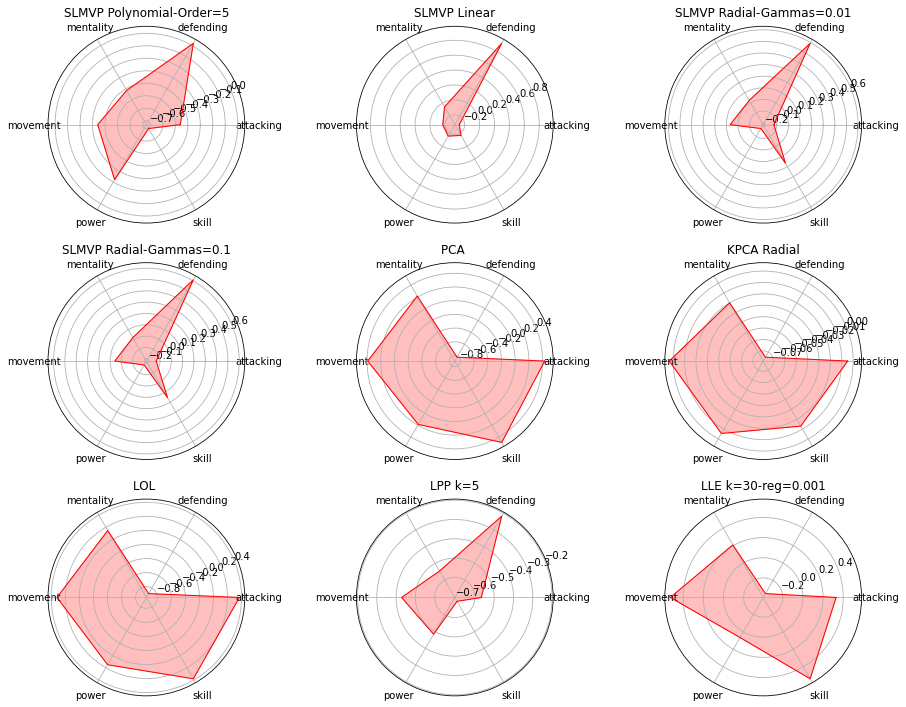

In [28]:
from datasets import fifa

fifa = fifa()
X_train, X_test, y_train, y_test = train_test_split(fifa.X, fifa.y, test_size=0.1, random_state=33)
dim = Dim()
dim.col_names = fifa.col_names
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test
dim.new_dim = dict()
dim.apply_dim(num_dim=[1], tflag=[6,7,8])

df = dim.get_corr_table(1, abs=False)
df_rank = df.reset_index()
df_rank['skill set'] = df_rank['index'].str.split('_', n=1).str[0]
df_rank = df_rank.set_index('index')
df_spider = df_rank.groupby('skill set').mean()
df_spider = df_spider.droplevel(0, axis=1)
df_spider.columns = [x[0] + ' ' + x[1] for x in df_spider.columns]

figsize = (13, 10)
n_rows = 3
n_cols = 3

# Create a figure and subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, subplot_kw={'projection': 'polar'})
#fig.suptitle('Radar Chart Subplots')
axs = axs.flatten()

# Get categories
categories = df_spider.index.to_list()

# Create radar charts for each subplot
for i, key in enumerate(list(df_spider.keys())):
    ax = axs[i]
    ax.set_title(key)

    # Calculate angle and normalize values
    values = df_spider[key].to_list()
    values += values[:1]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    # Plot the radar chart
    ax.plot(angles, values, color='red', linewidth=1)
    ax.fill(angles, values, color='red', alpha=0.25)
    ax.set_xticks(np.linspace(0, 2 * np.pi, len(categories), endpoint=False))
    ax.set_xticklabels(categories)

fig.tight_layout()

#plt.savefig('plots/spider_fifa.png', dpi=300, bbox_inches='tight')
plt.show()

### COIL2000

In [2]:
coil = coil2000()

coil_df = pd.DataFrame(coil.data, columns=coil.col_names)
coil_df = coil_df.sort_values(coil_df.columns[-1], ascending=False).head(1000)

X_train, X_test, y_train, y_test = train_test_split(coil_df.iloc[:, :-1].to_numpy(), coil_df.iloc[:, -1].to_numpy(), test_size=0.2, random_state=33)

dim = Dim()
dim.col_names = coil.col_names
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

#dim.apply_dim(num_dim=[1], tflag=[1,7])
dim.apply_dim(num_dim=[1], tflag=[1,2,3,5,6,7,8,9,10,11,12])

('1Dim', 'SLMVP', 'Radial-Gammas=0.1'): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


#### Hbar Plot

1 dim

100%|██████████| 2/2 [00:00<00:00, 151.42it/s]


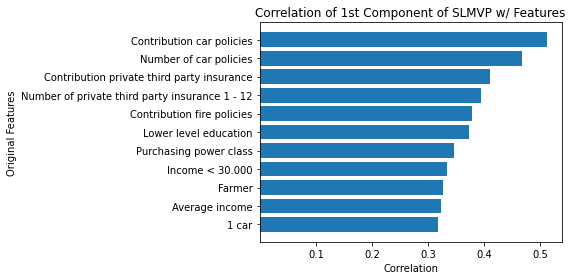

In [7]:
dim.apply_dim(num_dim=[1], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(1)

# Sample data

values = df[('1Dim', 'SLMVP',  'Radial-Gammas=0.1', 0)].sort_values(ascending=True)[-15:]
categories = values.index
# Create horizontal bar plot
plt.figure(figsize=(8, 4))
plt.barh(categories, values)
# Add labels and title
plt.xticks([0.1,0.2,0.3,0.4,0.5])
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 1st Component of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_coil.png')

5 dim

100%|██████████| 1/1 [00:00<00:00,  5.82it/s]


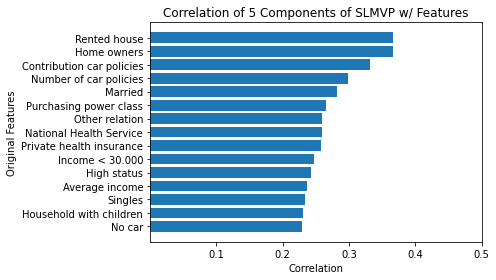

In [12]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[5], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(5)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

# Sample data

values = df[('5Dim', 'SLMVP',  'Radial-Gammas=0.1')].sort_values(ascending=True)[-15:]
categories = values.index
# Create horizontal bar plot
plt.figure(figsize=(7, 4))
plt.barh(categories, values)
# Add labels and title
plt.xticks([0.1,0.2,0.3,0.4,0.5])
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 5 Components of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_coil_5dim.png')

20 dim

100%|██████████| 1/1 [00:00<00:00, 17.03it/s]


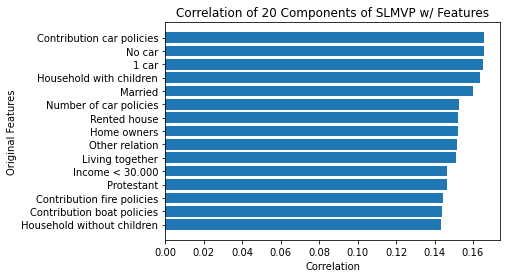

In [11]:
dim.new_dim = dict()
dim.apply_dim(num_dim=[20], tflag=[1,2,3,5,6,7,8,9,10,11,12])
df = dim.get_corr_table(20)
weights = dim.get_weights().droplevel(3, axis=1)

for key in weights.keys():
    for i in range(weights.shape[0]):
        perc_var = weights[key][i]
        df[key][i] = df[key][i].apply(lambda x: x*perc_var)

reduced_keys = list(set([(x[0],x[1],x[2]) for x in df.keys()]))

for key in reduced_keys:
    df[key] = df[key].sum(axis=1)

df = df.T.drop_duplicates().T.droplevel(3, axis=1)

# Sample data

values = df[('20Dim', 'SLMVP',  'Radial-Gammas=0.1')].sort_values(ascending=True)[-15:]
categories = values.index
# Create horizontal bar plot
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 20 Components of SLMVP w/ Features')
plt.savefig('plots/hbar_coil_20dim.png')

100%|██████████| 10/10 [00:00<00:00, 282.48it/s]


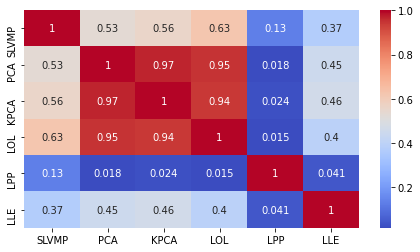

In [16]:
df = dim.get_corr_table(1)
df= df.drop(
    [('1Dim','SLMVP', 'Linear'),
    ('1Dim','SLMVP', 'Radial-Gammas=0.01'),
    ('1Dim','KPCA', 'Linear'),
    ('1Dim','KPCA', 'Radial-Gamma=0.1')],
      axis=1)
df = df.droplevel(3, axis=1)
df = df.droplevel(0, axis=1)
df = df.droplevel(1, axis=1)
plt.figure(figsize=(7.5,4))
col_labels = ['SLVMP','PCA','KPCA','LOL','LPP', 'LLE']
sns.heatmap(df.corr(method='spearman').abs(), annot=True, cmap='coolwarm',
             xticklabels=col_labels, yticklabels=col_labels)

plt.savefig('plots/heatmap_coil.png', dpi=300, bbox_inches='tight')

In [ ]:
dim.plot_artificial(n_rows=2, n_cols=4, figsize=(15, 8), save_name=None)

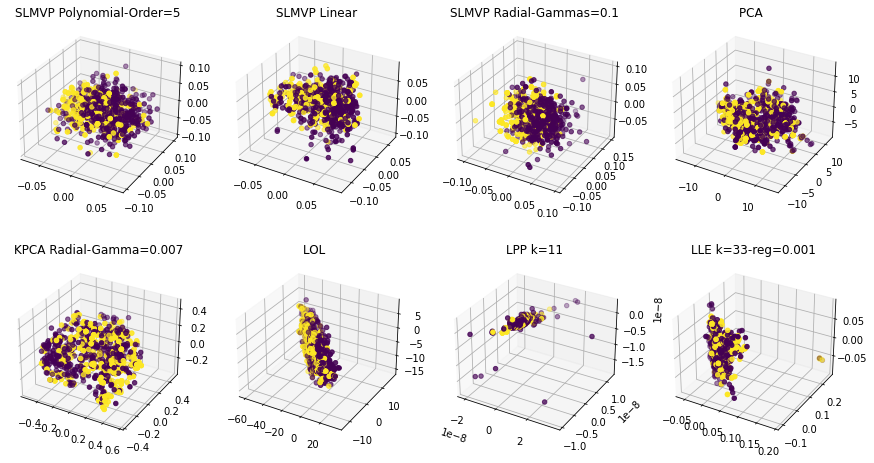

In [9]:
dim.plot_artificial_3D(n_rows=2, n_cols=4, figsize=(15, 8), save_name='coil2000_3d.png')  

In [3]:
dim.apply_clf().head(5)

AdaBoost: 100%|██████████| 50/50 [12:50<00:00, 15.42s/it]


saved as 07-04-18:57(.csv)(.xlsx)


Model  Accuracy                                             Params  \
261       LDA     0.775                             {'lda__solver': 'svd'}   
51        KNN     0.760                          {'knn__n_neighbors': 100}   
61        KNN     0.760                          {'knn__n_neighbors': 100}   
301  AdaBoost     0.760  {'ada__learning_rate': 0.1, 'ada__n_estimators...   
251       LDA     0.755                            {'lda__solver': 'lsqr'}   

       MAE Dimensions Dim. Technique         Dim. Params  
261  0.225       3Dim          SLMVP  Radial-Gammas=0.01  
51   0.240       1Dim          SLMVP  Radial-Gammas=0.01  
61   0.240       3Dim          SLMVP  Radial-Gammas=0.01  
301  0.240       1Dim          SLMVP  Radial-Gammas=0.01  
251  0.245       1Dim          SLMVP  Radial-Gammas=0.01

In [ ]:
dim.apply_clf().head(5)

AdaBoost: 100%|██████████| 55/55 [27:01<00:00, 29.48s/it]


saved as 06-17-16:39(.csv)(.xlsx)


Model  Best Score  \
23         XGBoost    0.931389   
182  Decision Tree    0.929674   
417       AdaBoost    0.929674   
14         XGBoost    0.929674   
69             KNN    0.929674   

                                                Params Dimensions  \
23                           {'xgb__n_estimators': 10}       3Dim   
182                               {'dt__max_depth': 5}       2Dim   
417  {'ada__learning_rate': 1.0, 'ada__n_estimators...       3Dim   
14                           {'xgb__n_estimators': 10}       2Dim   
69                            {'knn__n_neighbors': 10}       2Dim   

    Dim. Technique        Dim. Params  
23           SLMVP             Linear  
182           KPCA   Radial-Gamma=0.1  
417            LLE     k=72-reg=0.001  
14           SLMVP  Radial-Gammas=0.1  
69           SLMVP  Radial-Gammas=0.1

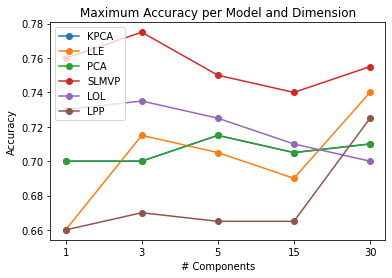

In [5]:
# TODO

df = pd.read_csv('scores/07-04-18:57.csv', index_col=0)
if 'Best Score' in df.columns:
    df = df.rename(columns = {'Best Score':'Accuracy'})
df['Dimensions'] = df['Dimensions'].str[:-3].astype(int)


max_value_mask = df.groupby(['Dim. Technique', 'Dimensions'])['Accuracy'].idxmax()
df = df.loc[max_value_mask]
df = df.set_index('Dimensions').sort_values(['Dimensions','Accuracy'], ascending=[1,0])
df = df[['Dim. Technique', 'Dim. Params', 'Model', 'Accuracy']]

x_values = ['1', '3', '5', '15', '30']
techniques = ['KPCA', 'LLE', 'PCA', 'SLMVP', 'LOL', 'LPP']

for tech in techniques:
    plt.plot(x_values, df[df['Dim. Technique'] == tech]['Accuracy'], marker='o', label=tech)

# Adding labels and title
plt.xticks(x_values)
plt.xlabel('# Components')
plt.ylabel('Accuracy')
plt.title('Maximum Accuracy per Model and Dimension')
plt.legend()
plt.savefig('plots/coil_line_chart.png')
plt.show()

In [ ]:
print(df.to_latex(na_rep=''))

### Wine

In [2]:
from datasets import wine

data = wine()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

dim = Dim()

dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.apply_dim(num_dim=[3], tflag=[3,6,7,8])

('3Dim', 'LLE', 'k=30-reg=0.001'): 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]


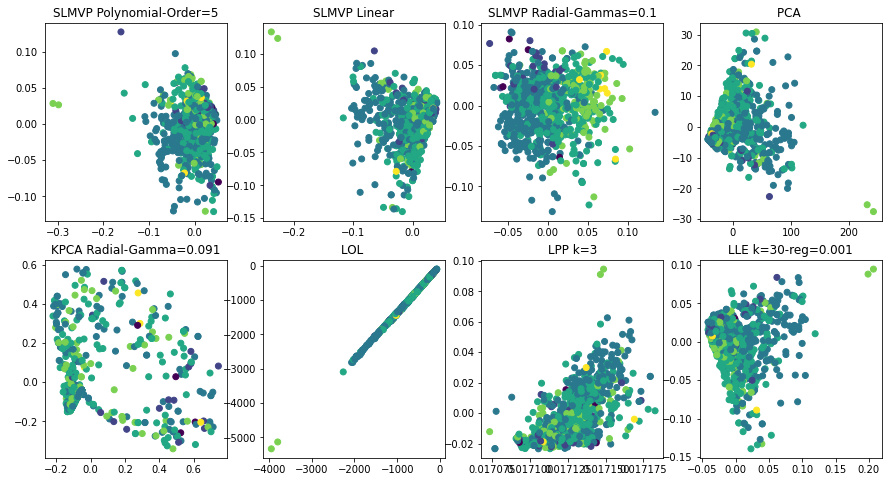

In [5]:
dim.plot_artificial(n_rows=2, n_cols=4, figsize=(15, 8), save_name=None)

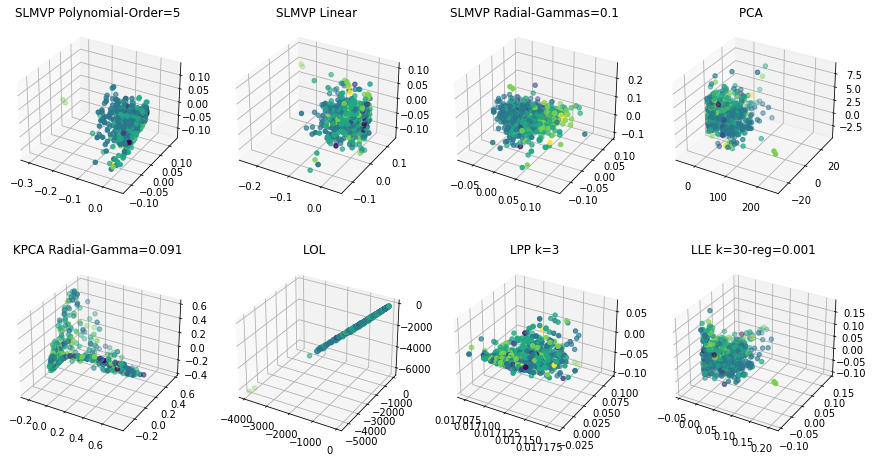

In [7]:
dim.plot_artificial_3D(n_rows=2, n_cols=4, figsize=(15, 8), save_name=None)  